In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from openpyxl import load_workbook
import timeit
# read RData
# import pyreadr
import re
import gc
# read & write xlsx
import openpyxl

import glob
import zipfile
from zipfile import ZipFile
import os
from os.path import basename
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 4000;
# pd.set_option('display.max_colwidth', None)

# print all lines:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def wsht():
    return load_workbook(path).sheetnames

def dom(shn):
    return pd.read_excel(path, sheet_name=shn)

def L(x ):
    return set(x['File_Name'])

# from PAT_Helper import*

# from PAT_func import*

# %run -i "PAT_Helper.py" 
# %run -i "PAT_func.py" 

# %run -i "PAT_Helper1.py" 
# %run -i "PAT_func1.py" 
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import math


In [3]:
df_1 = pd.read_pickle('Unique_Pt_20240603_1.pkl')
df_1.shape
df_1.columns

(56282, 64)

Index(['File_Name', 'Patient_ID_md_hex', 'Organization', 'Software',
       'Document_Date', 'Effective_Date', 'Start_Date', 'End_Date',
       'Procedure_Date', 'Procedure_Text', 'Procedure_Display_Name',
       'Procedure_Code', 'Procedure_Code_System', 'Procedure_Code_System_Name',
       'Procedure_Date_f', 'Doc_Date', 'Doc_Year', 'Doc_Date_f',
       'Procedure_Code_Description', 'Procedure_Text_c',
       'Procedure_Display_Name_c', 'PT_no_punct', 'PDN_no_punct', 'PC',
       'Vendor', 'ptdn_f', 'PCS', 'PCS_f', 'PCSN', 'PCSN_f', 'PC_PCS',
       'PC_PCS_PCSN', 'PC_PCS_PCSN_PDt', 'PC_PCS_PCSN_PDt_pt_pdn', '!NLP_var',
       'NLP_var2', 'NLP_var', 'PC_PCS_PCSN_PDt_pt_pdn_nlp', 'Usable2',
       'Proc_Date', 'Proc_Year', 'Proc_Month', 'Proc_Day', 'Pt_ID_cnt', 'PC_f',
       'PC_fs', '!NLP_var_s', 'Usable', 'Procedure_Text_p',
       'Procedure_Display_Name_p', 'PC1', 'PCS1', 'Epic_Partner',
       'Cerner_Partner', 'Month_cnt', 'Vendor_New', 'PC_Type', 'PC_Type2',
       'PCS_Type2'

In [4]:
df_1.ProcedureDt.value_counts(dropna=False)
df_1[df_1.ProcedureDt=="Present"].ProcedureDt.value_counts(dropna=False)

print()

df_1.PC_Type2.value_counts(dropna=False)
df_1[df_1.PC_Type2=="Usable PC"].PC_Type2.value_counts(dropna=False)

print()

df_1.PCS_Type2.value_counts(dropna=False)
df_1[df_1.PCS_Type2=="Usable PCS"].PCS_Type2.value_counts(dropna=False)

print()

df_1.PCSN_Type.value_counts(dropna=False)
df_1[df_1.PCSN_Type=="Usable PCSN"].PCSN_Type.value_counts(dropna=False)

print()

df_1['Pt Dn'].value_counts(dropna=False)
df_1[df_1['Pt Dn']=="Yes"]['Pt Dn'].value_counts(dropna=False)

print()

df_1['Pt_Desc'].value_counts(dropna=False)
df_1[df_1['Pt_Desc']=="Yes"]['Pt_Desc'].value_counts(dropna=False)


Present    52802
Missing     3480
Name: ProcedureDt, dtype: int64

Present    52802
Name: ProcedureDt, dtype: int64

Usable PC        26566
UNK              17274
Not Usable PC    12111
OTH                311
Missing             20
Name: PC_Type2, dtype: int64

Usable PC    26566
Name: PC_Type2, dtype: int64

Usable PCS        31730
Missing           17262
Not Usable PCS     7290
Name: PCS_Type2, dtype: int64

Usable PCS    31730
Name: PCS_Type2, dtype: int64

Usable PCSN        29611
Missing            19384
Epic.EAP.ID         6651
Not Usable PCSN      636
Name: PCSN_Type, dtype: int64

Usable PCSN    29611
Name: PCSN_Type, dtype: int64

Yes    52375
No      3907
Name: Pt Dn, dtype: int64

Yes    52375
Name: Pt Dn, dtype: int64

No     32310
Yes    23972
Name: Pt_Desc, dtype: int64

Yes    23972
Name: Pt_Desc, dtype: int64

In [5]:
check = df_1[(df_1.ProcedureDt=="Present") & (df_1.PC_Type2=="Usable PC")&(df_1.PCS_Type2=="Usable PCS")&(df_1.PCSN_Type=="Usable PCSN")&(df_1['Pt Dn']=="Yes")&(df_1['Pt_Desc']=="Yes")]
check.shape
check.Usable.value_counts(dropna=False)

(18412, 64)

Yes    18412
Name: Usable, dtype: int64

In [6]:
20108/56282


0.3572723073096194

In [7]:
# df_1 = pd.read_pickle('Unique_Pt_20240603_1.pkl')
df_1.shape
print('Software:', df_1.Software.nunique())
print('Organization:', df_1.Organization.nunique())
print('Vendor:', df_1.Vendor.nunique())
df_1.Software.value_counts(dropna=False).to_frame().reset_index().rename(columns={'index':'Software', 'Software':'Records'}).head(20)
df_1.Vendor.value_counts(dropna=False).to_frame().reset_index().rename(columns={'index':'Vendor', 'Vendor':'Records'})


df_1.columns

(56282, 64)

Software: 181
Organization: 3479
Vendor: 27


Software  Records
0                        Epic - Version 10.2 Epic - Version 10.2    20924
1                        Epic - Version 10.3 Epic - Version 10.3    16366
2      Cerner Corporation Millennium Clinical Document Generator     5851
3                        Epic - Version 10.4 Epic - Version 10.4     4868
4                                                            nan     2133
5                                  No Information No information     1656
6                         Cerner Corporation Millennium Clinical      902
7                        eClinicalWorks CCDA V3.0 eClinicalWorks      542
8                          InterSystems InterSystems HealthShare      505
9                        Epic - Version 10.1 Epic - Version 10.1      502
10                                 CPLHCI.LIVE60N CPLHCI.LIVE60N       93
11                                         SHCE.LIVEN SHCS.LIVEN       86
12                       athenahealth Document Generation Engine       78
13                                         SHCS.LIVEN SHCS.LIVEN       78
14                         Epic - Version 9.6 Epic - Version 9.6       69
15         Spohn Health LIVE HCIS Interface Device MEDITECH HCIS       66
16                                       AVERA.LIVEN AVERA.LIVEN       63
17  Diameter Health Fusion v4.9.0 Diameter Health Quality C-CDA/       61
18                         Epic - Version 9.9 Epic - Version 9.9       56
19                                           NMN.LIVEN NMN.LIVEN       53

Vendor  \
0                                                                                    Epic   
1                                                                                  Cerner   
2                                                                                 Missing   
3                                                                                  .LIVEN   
4                                                                          eClinicalWorks   
5                                                   InterSystems InterSystems HealthShare   
6                                                                        Greenway Intergy   
7                                                                           MEDITECH HCIS   
8                                                                         Diameter Health   
9                                                              Document Generation Engine   
10                                                                         Varian Medical   
11                                                      dbMotion 1.0.0.0 dbMotion 1.0.0.0   
12                                                                     AllScripts Paragon   
13                                                                       Professional EHR   
14                                                                                NextGen   
15                                     Sunrise Clinical Manager  Sunrise Clinical Manager   
16                                              Practice Fusion, Inc. Practice Fusion EHR   
17                                                                              Smartlink   
18                                                          Altera Digital Health Paragon   
19                                                Sunrise Clinical Manager  Sunrise Clini   
20                                                Mile Bluff Medical Center Interface Dev   
21                                                Indian Health Service BCCD - CIHA HOSPI   
22                                                AMITA HEALTH Elgin Interface Device MED   
23  Indian Health Service BCCD - CIHA HOSPITAL (8259) Indian Health Service CCD Generator   
24                                                Monongahela Valley Hospital Interface D   
25                                                Presence Saint Joseph Hospital Interfac   
26                                                Northern Regional Hospital Interface De   

    Records  
0     43077  
1      6753  
2      3789  
3       624  
4       554  
5       505  
6       263  
7       195  
8       177  
9        87  
10       55  
11       52  
12       46  
13       39  
14       22  
15       17  
16        8  
17        6  
18        3  
19        3  
20        1  
21        1  
22        1  
23        1  
24        1  
25        1  
26        1

Index(['File_Name', 'Patient_ID_md_hex', 'Organization', 'Software',
       'Document_Date', 'Effective_Date', 'Start_Date', 'End_Date',
       'Procedure_Date', 'Procedure_Text', 'Procedure_Display_Name',
       'Procedure_Code', 'Procedure_Code_System', 'Procedure_Code_System_Name',
       'Procedure_Date_f', 'Doc_Date', 'Doc_Year', 'Doc_Date_f',
       'Procedure_Code_Description', 'Procedure_Text_c',
       'Procedure_Display_Name_c', 'PT_no_punct', 'PDN_no_punct', 'PC',
       'Vendor', 'ptdn_f', 'PCS', 'PCS_f', 'PCSN', 'PCSN_f', 'PC_PCS',
       'PC_PCS_PCSN', 'PC_PCS_PCSN_PDt', 'PC_PCS_PCSN_PDt_pt_pdn', '!NLP_var',
       'NLP_var2', 'NLP_var', 'PC_PCS_PCSN_PDt_pt_pdn_nlp', 'Usable2',
       'Proc_Date', 'Proc_Year', 'Proc_Month', 'Proc_Day', 'Pt_ID_cnt', 'PC_f',
       'PC_fs', '!NLP_var_s', 'Usable', 'Procedure_Text_p',
       'Procedure_Display_Name_p', 'PC1', 'PCS1', 'Epic_Partner',
       'Cerner_Partner', 'Month_cnt', 'Vendor_New', 'PC_Type', 'PC_Type2',
       'PCS_Type2'

In [28]:
# Exclude Missing Vendors and Vendors that has less than 100 records. 

df_new = df_1[df_1["Vendor"].isin(["Epic", "Cerner",   "eClinicalWorks", "InterSystems InterSystems HealthShare", "Greenway Intergy", "MEDITECH HCIS", "Diameter Health"])]
print('Total Records:', df_new.shape)
print('Software:', df_new.Software.nunique())
print('Organization:', df_new.Organization.nunique())
print('Vendor:',df_new.Vendor.nunique())
dfv_c = df_new.Vendor.value_counts(dropna=False).to_frame().reset_index()
dfv_c.rename(columns=({"index":"Vendor", "Vendor":"Count"}), inplace=True)

dfv_p = df_new.Vendor.value_counts(dropna=False, normalize = True).to_frame().reset_index()
dfv_p.rename(columns=({"index":"Vendor", "Vendor":"Pct_%"}), inplace=True)

dfv = pd.merge(dfv_c, dfv_p, on = "Vendor")
dfv["Pct_%"] = np.round(dfv["Pct_%"]*100, decimals = 1)
dfv

Total Records: (51524, 64)
Software: 87
Organization: 3112
Vendor: 7


Vendor  Count  Pct_%
0                                   Epic  43077   83.6
1                                 Cerner   6753   13.1
2                         eClinicalWorks    554    1.1
3  InterSystems InterSystems HealthShare    505    1.0
4                       Greenway Intergy    263    0.5
5                          MEDITECH HCIS    195    0.4
6                        Diameter Health    177    0.3

In [8]:
print("df_new.Organization", df_new.Organization.nunique())

df_new.Organization.value_counts(dropna=False, normalize = False).to_frame().reset_index().head(120)



df_new.Organization 3112


index  \
0                                                                  UCHealth and Affiliates   
1                                                        Bon Secours Mercy Health O.H.C.A.   
2                                                                            Prisma Health   
3                                            Gundersen Health System and Regional Partners   
4                                 Sutter Health Affiliates and Community Connect Practices   
5                                                                            Novant Health   
6                                                                Baptist Healthcare System   
7                                                 ThedaCare, Bellin Health, and Affiliates   
8                                                                          Spectrum Health   
9                                                                  Riverside Health System   
10                                          Essentia Health and Community Connect Partners   
11                                                                  Advocate Aurora Health   
12                                   Providence Health and Services Washington and Montana   
13                                                                                 Aspirus   
14                                            Allina Health Systems & Excellian Affiliates   
15                                                                       UnityPoint Health   
16                                                                             Mayo Clinic   
17                               Ochsner Health System and Its Subsidiaries and Affiliates   
18                                                                              SSM Health   
19                                    Providence Health and Services Oregon and California   
20                                                                   Shannon Health System   
21                                                          Allegheny Health Network (AHN)   
22                                                           Sanford Health and Affiliates   
23                                                                    Mass General Brigham   
24                                                                          Centura Health   
25                                                                         UNC Health Care   
26                                                                             MHC Network   
27                                                                      The Guthrie Clinic   
28                                                                             Cone Health   
29                                                                           Atrium Health   
30                                                       Atrium Health Wake Forest Baptist   
31                                       UW Health and Affiliates - Wisconsin and Illinois   
32                                                                              OhioHealth   
33                                                               St. Charles Health System   
34                                                                                Fairview   
35                                                        CentraCare Health and Affiliates   
36                                                       West Virginia University Medicine   
37                                                                         CHRISTUS Health   
38                                                  Spartanburg Regional Healthcare System   
39                                                                                   AnMed   
40                                                                     Piedmont Healthcare   
41                                                                         UPMC Central PA   
42                                         

In [ ]:
# df1[df1.Organization == "Steward Health Care System"].Vendor.value_counts(dropna=False).to_frame()

In [ ]:
# df1[df1.Vendor == ".LIVEN"].Organization.value_counts(dropna=False).to_frame()

In [9]:
df1 = df_new.copy()
df1.shape

(51524, 64)

In [ ]:
# df1.head(2)

In [10]:
df1.columns

Index(['File_Name', 'Patient_ID_md_hex', 'Organization', 'Software',
       'Document_Date', 'Effective_Date', 'Start_Date', 'End_Date',
       'Procedure_Date', 'Procedure_Text', 'Procedure_Display_Name',
       'Procedure_Code', 'Procedure_Code_System', 'Procedure_Code_System_Name',
       'Procedure_Date_f', 'Doc_Date', 'Doc_Year', 'Doc_Date_f',
       'Procedure_Code_Description', 'Procedure_Text_c',
       'Procedure_Display_Name_c', 'PT_no_punct', 'PDN_no_punct', 'PC',
       'Vendor', 'ptdn_f', 'PCS', 'PCS_f', 'PCSN', 'PCSN_f', 'PC_PCS',
       'PC_PCS_PCSN', 'PC_PCS_PCSN_PDt', 'PC_PCS_PCSN_PDt_pt_pdn', '!NLP_var',
       'NLP_var2', 'NLP_var', 'PC_PCS_PCSN_PDt_pt_pdn_nlp', 'Usable2',
       'Proc_Date', 'Proc_Year', 'Proc_Month', 'Proc_Day', 'Pt_ID_cnt', 'PC_f',
       'PC_fs', '!NLP_var_s', 'Usable', 'Procedure_Text_p',
       'Procedure_Display_Name_p', 'PC1', 'PCS1', 'Epic_Partner',
       'Cerner_Partner', 'Month_cnt', 'Vendor_New', 'PC_Type', 'PC_Type2',
       'PCS_Type2'

In [ ]:
# # Function to check word match and calculate percentage
# def calculate_match(row):
#     # Convert to lowercase and split into sets
#     set_col1 = set(row['PT_no_punct'].lower().split())  # Fixed by removing the comma
#     set_col2 = set(row['PDN_no_punct'].lower().split())
    
#     # Calculate intersection
#     match_words = set_col1 & set_col2
#     total_words = set_col1.union(set_col2)
    
#     # Calculate percentage match
#     match_percentage = len(match_words) / len(total_words) * 100 if total_words else 0
    
#     return pd.Series({
#         'PT_PDN': 'Yes' if match_words else 'No',
# #         'PT_PDN_Pct': f'{match_percentage:.2f}%'  # Format the percentage with 2 decimal places
#         'PT_PDN_Pct': match_percentage  # Format the percentage with 2 decimal places
#     })

# # Apply the function to the DataFrame
# df1[['PT_PDN', 'PT_PDN_Pct']] = df1.apply(calculate_match, axis=1)

# # Check the value counts
# print(df1['PT_PDN'].value_counts(dropna=False))
# print(df1['PT_PDN_Pct'].value_counts(dropna=False))

# # Display first 2 rows of the DataFrame
# df1.head(2)


In [ ]:
# # Function to check word match and calculate percentage
# def calculate_match(row):
#     # Convert to lowercase and split into sets
#     set_col1 = set(row['PT_no_punct'].lower().split())
#     set_col2 = set(row['PDN_no_punct'].lower().split())
    
#     # Calculate intersection
#     match_words = set_col1 & set_col2
#     total_words = set_col1.union(set_col2)
    
#     # Calculate percentage match
#     match_percentage = len(match_words) / len(total_words) * 100 if total_words else 0
    
#     return pd.Series({
#         'PT_PDN': 'Yes' if match_words else 'No',
#         'PT_PDN_Pct': match_percentage  # Return as a float instead of a formatted string
#     })

# # Apply the function to the DataFrame
# df1[['PT_PDN', 'PT_PDN_Pct']] = df1.apply(calculate_match, axis=1)

# # Ensure 'PT_PDN_Pct' is in float format (this should already be the case now)
# df1['PT_PDN_Pct'] = df1['PT_PDN_Pct'].astype(float)

# # Check the value counts for 'PT_PDN'
# print(df1['PT_PDN'].value_counts(dropna=False))

# # Display first 2 rows of the DataFrame
# df1.head(2)


In [11]:

df1.shape
# Check the value counts for 'PT_PDN'
print(df1['Pt Dn'].value_counts(dropna=False))

(51524, 64)

Yes    48819
No      2705
Name: Pt Dn, dtype: int64


In [12]:
# Function to check word match and calculate percentage
def calculate_match(row):
    # Convert to lowercase and split into sets
    set_col1 = set(row['PT_no_punct'].lower().split())
    set_col2 = set(row['PDN_no_punct'].lower().split())
    
    # Calculate intersection
    match_words = set_col1 & set_col2
    total_words = set_col1.union(set_col2)
    
    # Calculate percentage match
    match_percentage = len(match_words) / len(total_words) * 100 if total_words else 0
    
    return pd.Series({
        'PT_PDN': 'Yes' if match_percentage >79.9 else 'No',
        'PT_PDN_Pct': match_percentage  # Return as a float instead of a formatted string
    })

# Apply the function to the DataFrame
df1[['PT_PDN', 'PT_PDN_Pct']] = df1.apply(calculate_match, axis=1)

# Ensure 'PT_PDN_Pct' is in float format (this should already be the case now)
df1['PT_PDN_Pct'] = df1['PT_PDN_Pct'].astype(float)

# Check the value counts for 'PT_PDN'
print(df1['PT_PDN'].value_counts(dropna=False))

# Display first 2 rows of the DataFrame
df1.head(2)


Yes    48824
No      2700
Name: PT_PDN, dtype: int64


File_Name  \
83166  12840114350113359278688883749060940_20230628154125837000_1370355721308.xml   
25500   1284011435011347027868888371245299_20230511170004514000_1265259956417.xml   

                      Patient_ID_md_hex                  Organization  \
83166  FFFECBB5FD95BD8BDFF949890546B6D3        WellStar Health System   
25500  FFFB80D0DD2D6C3BA86A64C23EE0839D  FirstHealth of the Carolinas   

                                      Software Document_Date Effective_Date  \
83166  Epic - Version 10.3 Epic - Version 10.3    06/28/2023            nan   
25500  Epic - Version 10.3 Epic - Version 10.3    05/11/2023            nan   

       Start_Date    End_Date Procedure_Date         Procedure_Text  \
83166  11/18/2022  11/18/2022     11/18/2022  GI-COLONOSCOPY (LVL4)   
25500  06/14/2021  06/14/2021     06/14/2021  E.G.D. W/ COLONOSCOPY   

      Procedure_Display_Name Procedure_Code Procedure_Code_System  \
83166  GI-COLONOSCOPY (LVL4)            UNK                   nan   
25500  E.G.D. W/ COLONOSCOPY            UNK                   nan   

      Procedure_Code_System_Name Procedure_Date_f   Doc_Date  Doc_Year  \
83166                        nan                Y 2023-06-28      2023   
25500                        nan                Y 2023-05-11      2023   

      Doc_Date_f Procedure_Code_Description       Procedure_Text_c  \
83166          Y                        nan  GI-COLONOSCOPY (LVL4)   
25500          Y                        nan  E.G.D. W/ COLONOSCOPY   

      Procedure_Display_Name_c            PT_no_punct           PDN_no_punct  \
83166    GI-COLONOSCOPY (LVL4)  gi-colonoscopy  lvl4   gi-colonoscopy  lvl4    
25500    E.G.D. W/ COLONOSCOPY  e g d  w  colonoscopy  e g d  w  colonoscopy   

                                     PC Vendor ptdn_f      PCS PCS_f     PCSN  \
83166  OTH/Other/UNK/Unknown/NI/Missing   Epic      Y  Missing     N  Missing   
25500  OTH/Other/UNK/Unknown/NI/Missing   Epic      Y  Missing     N  Missing   

      PCSN_f PC_PCS PC_PCS_PCSN PC_PCS_PCSN_PDt PC_PCS_PCSN_PDt_pt_pdn  \
83166      N      N           N               N                      N   
25500      N      N           N               N                      N   

      !NLP_var NLP_var2 NLP_var PC_PCS_PCSN_PDt_pt_pdn_nlp Usable2  Proc_Date  \
83166        N        N       N                          N      No 2022-11-18   
25500        N        N       N                          N      No 2021-06-14   

       Proc_Year  Proc_Month  Proc_Day  Pt_ID_cnt PC_f PC_fs !NLP_var_s  \
83166       2022          11        18          2    N     N          N   
25500       2021           6        14          2    N     N          N   

      Usable       Procedure_Text_p Procedure_Display_Name_p  \
83166     No  GI-COLONOSCOPY (LVL4)    GI-COLONOSCOPY (LVL4)   
25500     No  E.G.D. W/ COLONOSCOPY    E.G.D. W/ COLONOSCOPY   

                                    PC1     PCS1   Epic_Partner  \
83166  OTH/Other/UNK/Unknown/NI/Missing  Missing  Partner Other   
25500  OTH/Other/UNK/Unknown/NI/Missing  Missing  Partner Other   

      Cerner_Partner  Month_cnt Vendor_New PC_Type PC_Type2 PCS_Type2  \
83166  Partner Other        960   Vendor 1     UNK      UNK   Missing   
25500  Partner Other        929   Vendor 1     UNK      UNK   Missing   

      PCSN_Type Proc_Y ProcedureDt Pt Dn Pt_Desc PT_PDN  PT_PDN_Pct  
83166   Missing   2022     Present   Yes      No    Yes       100.0  
25500   Missing   2021     Present   Yes      No    Yes       100.0

In [13]:
print(df1['PT_PDN'].value_counts(normalize = False, dropna=False))
print(df1['PT_PDN'].value_counts(normalize = True, dropna=False))

Yes    48824
No      2700
Name: PT_PDN, dtype: int64
Yes    0.947597
No     0.052403
Name: PT_PDN, dtype: float64


In [14]:
print(df1['PT_PDN_Pct'].value_counts(dropna=False))

100.000000    48819
11.111111       496
0.000000        385
12.500000       285
25.000000       243
16.666667       224
33.333333       195
20.000000       149
54.166667        91
10.000000        86
50.000000        82
66.666667        69
4.761905         48
63.636364        40
9.523810         36
5.263158         33
14.285714        32
3.571429         32
28.571429        23
77.777778        21
15.789474        16
9.090909         11
40.000000        10
71.428571         8
7.692308          7
5.882353          6
27.272727         6
8.333333          6
46.666667         6
6.666667          5
80.000000         4
30.000000         4
6.250000          4
60.000000         3
75.000000         3
4.545455          2
13.636364         2
62.500000         2
19.047619         2
30.769231         2
18.181818         2
72.727273         2
5.000000          2
22.222222         2
43.750000         1
5.555556          1
11.764706         1
21.428571         1
57.142857         1
54.545455         1


In [15]:
df1[(df1['PT_PDN_Pct'] >90) & (df1['PT_PDN_Pct'] <101)][['PT_PDN', 'PT_no_punct', 'PDN_no_punct', 'PT_PDN_Pct']].shape
df1[(df1['PT_PDN_Pct'] >50) & (df1['PT_PDN_Pct'] <100)][['PT_PDN', 'PT_no_punct', 'PDN_no_punct', 'PT_PDN_Pct']].head()

(48819, 4)

PT_PDN  \
52329      No   
110810     No   
158031    Yes   
54844      No   
135677     No   

                                                                                                                               PT_no_punct  \
52329                                                                               colonoscopy  flexible  with biopsy  single or multiple   
110810                                 colonoscopy  flexible  with removal of tumor s   polyp s   or other lesion s  by hot biopsy forceps   
158031                                                       colonoscopy  with removal of tumor s   polyp s   snare  preventative service    
54844   colonoscopy  flexible  diagnostic  including collection of specimen s  by brushing or washing  when performed  separate procedure    
135677                                                                                                              history of colonoscopy   

                                                                                                                                                                                      PDN_no_punct  \
52329                                                                                                          colonoscopy  flexible  proximal to splenic flexure  with biopsy  single or multiple   
110810                                         colonoscopy  flexible  proximal to splenic flexure  with removal of tumor s   polyp s   or other lesion s  by hot biopsy forceps or bipolar cautery   
158031                                                                                                                                      colonoscopy  with removal of tumor s   polyp s   snare   
54844   colonoscopy  flexible  proximal to splenic flexure  diagnostic  with or without collection of specimen s  by brushing or washing  with or without colon decompression  separate procedure    
135677                                                                                                                                                          history of colonoscopy  situation    

        PT_PDN_Pct  
52329    63.636364  
110810   71.428571  
158031   80.000000  
54844    54.166667  
135677   75.000000

In [16]:
check = df1[(df1.ProcedureDt=="Present") & (df1.PC_Type2=="Usable PC")&(df1.PCS_Type2=="Usable PCS")&(df1.PCSN_Type=="Usable PCSN")&(df1['Pt Dn']=="Yes")&(df1['Pt_Desc']=="Yes")]
check.shape
check.Usable.value_counts(dropna=False)

(17878, 66)

Yes    17878
Name: Usable, dtype: int64

In [17]:
df1.Pt_Desc.value_counts(dropna=False)

No     29591
Yes    21933
Name: Pt_Desc, dtype: int64

In [18]:
# df11.head()
# df1=df11[['Patient_ID_md_hex', 'Vendor', 'Organization','Epic_Partner', 'ProcedureDt','PC_f', 'PC_fs', 'PCS_f', 'PCSN_f', 'ptdn_f', 'Pt_Desc', 'PC_PCS_PCSN_PDt_pt_pdn', 'Usable']]
# df1.head()
# df1=df1[df1.Epic_Partner !="Partner 9"]
df1['ProcedureDt'].replace("Present", "Y", inplace=True)
df1['ProcedureDt'].replace("Missing", "N", inplace=True)

# df1['Usable'].replace("Yes", "Y", inplace=True)
# df1['Usable'].replace("No", "N", inplace=True)
df1['PT_PDN'].replace("Yes", "Y", inplace=True)
df1['PT_PDN'].replace("No", "N", inplace=True)

df1['Pt_Desc'].replace("Yes", "Y", inplace=True)
df1['Pt_Desc'].replace("No", "N", inplace=True)



df1.head()
df1.shape
# df1.Epic_Partner.value_counts()
# df1.Organization.nunique()
# df1[df1.Vendor=='Epic'].nunique()

File_Name  \
83166   12840114350113359278688883749060940_20230628154125837000_1370355721308.xml   
25500    1284011435011347027868888371245299_20230511170004514000_1265259956417.xml   
21296   12840114350113424278688883666279896_20230508175414736000_1256756741921.xml   
163995  12840114350113286278688883553021027_20230706163006515000_1385592264187.xml   
152884      2168401113883448499936224300383_20230627172434995000_1367897335923.xml   

                       Patient_ID_md_hex  \
83166   FFFECBB5FD95BD8BDFF949890546B6D3   
25500   FFFB80D0DD2D6C3BA86A64C23EE0839D   
21296   FFF9E8B4F54EF6D47339A84BBE108721   
163995  FFF9E01173E9A452076684C7E5FA26B5   
152884  FFF6B81D3ACDD5FB836AEE1CF898C6AD   

                                                     Organization  \
83166                                      WellStar Health System   
25500                                FirstHealth of the Carolinas   
21296                                     ProMedica Health System   
163995  Ochsner Health System and Its Subsidiaries and Affiliates   
152884                               Syringa Hospital and Clinics   

                                                         Software  \
83166                     Epic - Version 10.3 Epic - Version 10.3   
25500                     Epic - Version 10.3 Epic - Version 10.3   
21296                     Epic - Version 10.3 Epic - Version 10.3   
163995                    Epic - Version 10.2 Epic - Version 10.2   
152884  Cerner Corporation Millennium Clinical Document Generator   

       Document_Date Effective_Date  Start_Date    End_Date Procedure_Date  \
83166     06/28/2023            nan  11/18/2022  11/18/2022     11/18/2022   
25500     05/11/2023            nan  06/14/2021  06/14/2021     06/14/2021   
21296     05/08/2023     03/31/2021         nan         nan     03/31/2021   
163995    07/06/2023     01/26/2023         nan         nan     01/26/2023   
152884    10/17/2022     06/12/2017         nan         nan     06/12/2017   

                 Procedure_Text Procedure_Display_Name Procedure_Code  \
83166     GI-COLONOSCOPY (LVL4)  GI-COLONOSCOPY (LVL4)            UNK   
25500     E.G.D. W/ COLONOSCOPY  E.G.D. W/ COLONOSCOPY            UNK   
21296    ES COLONOSCOPY IMAGING  PROVATION COLONOSCOPY         181269   
163995              COLONOSCOPY            COLONOSCOPY         148178   
152884  Colonoscopy<sup>6</sup>            Colonoscopy       73761001   

                       Procedure_Code_System Procedure_Code_System_Name  \
83166                                    nan                        nan   
25500                                    nan                        nan   
21296   1.2.840.114350.1.13.424.2.7.2.696580                Epic.EAP.ID   
163995  1.2.840.114350.1.13.286.2.7.2.696580                Epic.EAP.ID   
152884                2.16.840.1.113883.6.96                  SNOMED CT   

       Procedure_Date_f   Doc_Date  Doc_Year Doc_Date_f  \
83166                 Y 2023-06-28      2023          Y   
25500                 Y 2023-05-11      2023          Y   
21296                 Y 2023-05-08      2023          Y   
163995                Y 2023-07-06      2023          Y   
152884                Y 2022-10-17      2022          Y   

       Procedure_Code_Description        Procedure_Text_c  \
83166                         nan   GI-COLONOSCOPY (LVL4)   
25500                         nan   E.G.D. W/ COLONOSCOPY   
21296                         nan  ES COLONOSCOPY IMAGING   
163995                        nan             COLONOSCOPY   
152884                Colonoscopy             Colonoscopy   

       Procedure_Display_Name_c             PT_no_punct  \
83166     GI-COLONOSCOPY (LVL4)   gi-colonoscopy  lvl4    
25500     E.G.D. W/ COLONOSCOPY   e g d  w  colonoscopy   
21296     PROVATION COLONOSCOPY  es colonoscopy imaging   
163995              COLONOSCOPY             colonoscopy   
152884              Colonoscopy             colonoscopy   

                 PDN_no_p

(51524, 66)

In [19]:

df1['ProcedureDt'].value_counts(dropna=False)
df1['PC_fs'].value_counts(dropna=False)
df1.PC_Type2.value_counts(dropna=False)
print()
df1['PCS_f'].value_counts(dropna=False)
df1.PCS_Type2.value_counts(dropna=False)
df1['PCSN_f'].value_counts(dropna=False)
df1.PCSN_Type.value_counts(dropna=False)
df1['PT_PDN'].value_counts(dropna=False)
df1['Pt_Desc'].value_counts(dropna=False)




Y    48556
N     2968
Name: ProcedureDt, dtype: int64

N    28181
Y    23343
Name: PC_fs, dtype: int64

Usable PC        23343
UNK              16185
Not Usable PC    11724
OTH                252
Missing             20
Name: PC_Type2, dtype: int64

Y    28075
N    23449
Name: PCS_f, dtype: int64

Usable PCS        28075
Missing           16207
Not Usable PCS     7242
Name: PCS_Type2, dtype: int64

Y    27668
N    23856
Name: PCSN_f, dtype: int64

Usable PCSN        27668
Missing            16625
Epic.EAP.ID         6651
Not Usable PCSN      580
Name: PCSN_Type, dtype: int64

Y    48824
N     2700
Name: PT_PDN, dtype: int64

N    29591
Y    21933
Name: Pt_Desc, dtype: int64

In [20]:
df1['Usable_f'] = np.where(
    (df1['ProcedureDt']=="Y")&(df1['PC_fs']=="Y")&(df1['PCS_f']=="Y")&(df1['PCSN_f']=="Y")
    &(df1['PT_PDN']=="Y")&(df1['Pt_Desc']=="Y"), "Y", "N")
df1['Usable_f'].value_counts(dropna=False)
df1['Usable'].value_counts(dropna=False)

N    33641
Y    17883
Name: Usable_f, dtype: int64

No     33646
Yes    17878
Name: Usable, dtype: int64

In [21]:
df1.shape

(51524, 67)

In [23]:
# 33879 + 18269

In [24]:
proc = df1.copy()
proc.shape

(51524, 67)

In [25]:
proc.Software.value_counts()

Epic - Version 10.2 Epic - Version 10.2                                              20924
Epic - Version 10.3 Epic - Version 10.3                                              16366
Cerner Corporation Millennium Clinical Document Generator                             5851
Epic - Version 10.4 Epic - Version 10.4                                               4868
Cerner Corporation Millennium Clinical                                                 902
eClinicalWorks CCDA V3.0 eClinicalWorks                                                542
InterSystems InterSystems HealthShare                                                  505
Epic - Version 10.1 Epic - Version 10.1                                                502
Epic - Version 9.6 Epic - Version 9.6                                                   69
Spohn Health LIVE HCIS Interface Device MEDITECH HCIS                                   66
Diameter Health Fusion v4.9.0 Diameter Health Quality C-CDA/                            61

In [ ]:
# proc.Vendor.value_counts(dropna=False).to_frame()

In [ ]:
# proc['Vendor'] = np.where(proc.Software.isnull(), 'Missing', proc.Software)
# proc['Vendor'] = np.where(proc.Vendor.str.lower().str.contains('missing|nan', na=False), 'Missing', proc.Vendor)
# proc['Vendor'] = np.where(proc.Vendor.str.lower().str.contains('no information', na=False), 'No Information No information', proc.Vendor)
# proc['Vendor'] = np.where(proc.Vendor.str.lower().str.contains('epic', na=False), 'Epic', proc.Vendor)
# proc['Vendor'] = np.where(proc.Vendor.str.lower().str.contains('cerner', na=False), 'Cerner', proc.Vendor)
# proc['Vendor'] = np.where(proc.Vendor.str.lower().str.contains('varian medical', na=False), 'Varian Medical', proc.Vendor)
# proc['Vendor'] = np.where(proc.Vendor.str.lower().str.contains('diameter', na=False), 'Diameter Health', proc.Vendor)
# proc['Vendor'] = np.where(proc.Vendor.str.lower().str.contains('shc', na=False), 'SHC S.LIVEN', proc.Vendor)
# proc['Vendor'] = np.where(proc.Vendor.str.lower().str.contains('nextg', na=False), 'NextGen', proc.Vendor)
# proc['Vendor'] = np.where(proc.Vendor.str.lower().str.contains('meditec', na=False), 'MEDITECH HCIS', proc.Vendor)
# proc['Vendor'] = np.where(proc.Vendor.str.lower().str.contains('greenway', na=False), 'Greenway Intergy', proc.Vendor)
# proc['Vendor'] = np.where(proc.Vendor.str.lower().str.contains('professional ehr', na=False), 'Professional EHR', proc.Vendor)
# proc['Vendor'] = np.where(proc.Vendor.str.lower().str.contains('eclinicalworks', na=False), 'eClinicalWorks', proc.Vendor)
# proc['Vendor'] = np.where(proc.Vendor.str.lower().str.contains('live', na=False), '.LIVEN', proc.Vendor)
# proc['Vendor'] = np.where(proc.Vendor.str.lower().str.contains('athenahealth', na=False), 'Document Generation Engine', proc.Vendor)



# proc.Vendor.nunique()
# proc.Vendor.value_counts(dropna=False).to_frame().shape
# proc.Vendor.value_counts(dropna=False).to_frame()

In [ ]:
# proc[proc.Vendor=='.LIVEN'].Organization.value_counts()

In [ ]:
proc.Vendor.value_counts(dropna=False).to_frame()

In [ ]:
# def v(i):
#     if i=="Epic":
#         return "Vendor 1"
#     elif i=="Cerner":
#         return "Vendor 2"
#     elif i==".LIVEN":
#         return "Vendor 3"
#     elif i=='eClinicalWorks':
#         return "Vendor 4"
#     elif i=="InterSystems InterSystems HealthShare":
#         return "Vendor 5"
# #     elif i=="Greenway Intergy":
# #         return "Vendor 6"
# #     elif i=="MEDITECH HCIS":
# #         return "Vendor 7"
# #     elif i=="Diameter Health":
# #         return "Vendor 8"
#     else:
#         return "Vendor Other"

In [71]:
def v(i):
    if i=="Epic":
        return "Vendor 1"
    elif i=="Cerner":
        return "Vendor 2"
#     elif i==".LIVEN":
#         return "Vendor 3"
    elif i=='eClinicalWorks':
        return "Vendor 3"
    elif i=="InterSystems InterSystems HealthShare":
        return "Vendor 4"
#     elif i=="Greenway Intergy":
#         return "Vendor 5"
#     elif i=="MEDITECH HCIS":
#         return "Vendor 7"
#     elif i=="Diameter Health":
#         return "Vendor 8"
    else:
        return "Vendor Other"

In [72]:
proc['Vendor_New'] = proc.Vendor.apply(v)
proc['Vendor_New'].value_counts().to_frame()

Vendor_New
Vendor 1           43077
Vendor 2            6753
Vendor Other         635
Vendor 3             554
Vendor 4             505

In [73]:
proc['ProcedureDt'].value_counts(dropna=False)
proc['PT_PDN'].value_counts(dropna=False)

Y    48556
N     2968
Name: ProcedureDt, dtype: int64

Y    48824
N     2700
Name: PT_PDN, dtype: int64

In [74]:
proc.columns

Index(['File_Name', 'Patient_ID_md_hex', 'Organization', 'Software',
       'Document_Date', 'Effective_Date', 'Start_Date', 'End_Date',
       'Procedure_Date', 'Procedure_Text', 'Procedure_Display_Name',
       'Procedure_Code', 'Procedure_Code_System', 'Procedure_Code_System_Name',
       'Procedure_Date_f', 'Doc_Date', 'Doc_Year', 'Doc_Date_f',
       'Procedure_Code_Description', 'Procedure_Text_c',
       'Procedure_Display_Name_c', 'PT_no_punct', 'PDN_no_punct', 'PC',
       'Vendor', 'ptdn_f', 'PCS', 'PCS_f', 'PCSN', 'PCSN_f', 'PC_PCS',
       'PC_PCS_PCSN', 'PC_PCS_PCSN_PDt', 'PC_PCS_PCSN_PDt_pt_pdn', '!NLP_var',
       'NLP_var2', 'NLP_var', 'PC_PCS_PCSN_PDt_pt_pdn_nlp', 'Usable2',
       'Proc_Date', 'Proc_Year', 'Proc_Month', 'Proc_Day', 'Pt_ID_cnt', 'PC_f',
       'PC_fs', '!NLP_var_s', 'Usable', 'Procedure_Text_p',
       'Procedure_Display_Name_p', 'PC1', 'PCS1', 'Epic_Partner',
       'Cerner_Partner', 'Month_cnt', 'Vendor_New', 'PC_Type', 'PC_Type2',
       'PCS_Type2'

In [75]:
proc[proc.Vendor_New=='Vendor 2'].Organization.value_counts(dropna=False).to_frame()

Organization
UPMCHZN                                                               101
UPMCPAS                                                                84
UPMCWIL                                                                66
CoxHealth                                                              56
Mission Hospital                                                       54
Frye Regional Medical Center                                           48
668 Mann-Grandstaff WA VA Medical Center                               48
Trinity MOB                                                            47
Billings Clinic Downtown                                               45
UPMCPUH                                                                45
JHL Jewish Hospital                                                    44
Gerald Champion Regional Medical Center                                43
Grayling Hospital                                                      40
University Medical Center                                              40
Winona Health Services                                                 36
Union General Hospital                                                 36
Mercy Medical Center - North Iowa                                      35
UPMCHAM                                                                35
Rutland Regional Medical Center                                        34
Mercy Medical Center - Dubuque                                         33
Memorial Hospital of Sheridan County                                   33
UPMCSMH                                                                32
St. Francis Hospital                                                   32
Columbus Regional Healthcare System                                    31
UPMCNOR                                                                31
UABC                                                                   30
The Hospitals of Providence Transmountain Campus                       30
Tennova Healthcare - Clarksville                                       30
Lutheran Hospital                                                      29
Flowers Hospital                                                       29
ULH University of Louisville Hospital                                  29
USA Medical Center                                                     27
UPMCMWH                                                                27
Marshfield Medical Center - Marshfield                                 27
Tennova - Turkey Creek Medical Center                                  26
The Hospitals of Providence East Campus                                26
Jackson Madison County General Hospital                                25
HMC Hershey Medical Center                                             25
Western Missouri Medical Center                                        25
St.Vincent Medical Center                                              23
Christiana                                                             23
UPMCSHY                                                                23
Iredell Memorial Hospital                                              22
Valley Native Primary Care Center                                      21
Billings Clinic Hospital                                               20
Marshfield Medical Center - Weston                                     20
TTP - Urology Clinic                                                   20
MERCY HEALTH MUSKEGON                                                  20
UPMCBED                                                                20
Southeast Hospital                                                     19
St. Joseph's Medical Center - Stockton                                 19
Regional West Medical Center                                           19
HC-Town and Country Cancer Care                                        18
Doctors Care - Little River                                      

In [76]:
# Small effect size: 
# 𝑓2=0.02f2 =0.02
# Medium effect size: 
# 𝑓2=0.15f 2 =0.15
# Large effect size: 
# 𝑓2=0.35f2=0.35

import statsmodels.stats.api as sms
from math import ceil

# Define parameters for regression
effect_size = 0.35  # Medium effect size for regression (Cohen's f^2)
alpha = 0.05        # Significance level
power = 0.80        # Desired power level
num_predictors = 6  # Number of predictors

# Calculate the required sample size for F-test (used for regression analysis)
sample_size = sms.FTestAnovaPower().solve_power(effect_size=effect_size, 
                                                k_groups=num_predictors, 
                                                alpha=alpha, 
                                                power=power)

# Round up to the nearest whole number
sample_size = ceil(sample_size)

print(f"Required sample size: {sample_size}")

Required sample size: 111


In [77]:
proc.Organization.value_counts(dropna=False).to_frame().reset_index()

index  \
0                                                                   UCHealth and Affiliates   
1                                                         Bon Secours Mercy Health O.H.C.A.   
2                                                                             Prisma Health   
3                                             Gundersen Health System and Regional Partners   
4                                  Sutter Health Affiliates and Community Connect Practices   
5                                                                             Novant Health   
6                                                                 Baptist Healthcare System   
7                                                  ThedaCare, Bellin Health, and Affiliates   
8                                                                           Spectrum Health   
9                                                                   Riverside Health System   
10                                           Essentia Health and Community Connect Partners   
11                                                                   Advocate Aurora Health   
12                                    Providence Health and Services Washington and Montana   
13                                                                                  Aspirus   
14                                             Allina Health Systems & Excellian Affiliates   
15                                                                        UnityPoint Health   
16                                                                              Mayo Clinic   
17                                Ochsner Health System and Its Subsidiaries and Affiliates   
18                                                                               SSM Health   
19                                     Providence Health and Services Oregon and California   
20                                                                    Shannon Health System   
21                                                           Allegheny Health Network (AHN)   
22                                                            Sanford Health and Affiliates   
23                                                                     Mass General Brigham   
24                                                                           Centura Health   
25                                                                          UNC Health Care   
26                                                                              MHC Network   
27                                                                       The Guthrie Clinic   
28                                                                              Cone Health   
29                                                                            Atrium Health   
30                                                        Atrium Health Wake Forest Baptist   
31                                        UW Health and Affiliates - Wisconsin and Illinois   
32                                                                               OhioHealth   
33                                                                St. Charles Health System   
34                                                                                 Fairview   
35                                                         CentraCare Health and Affiliates   
36                                                        West Virginia University Medicine   
37                                                                          CHRISTUS Health   
38                                                   Spartanburg Regional Healthcare System   
39                                                                                    AnMed   
40                                                                      Piedmont Healthcare   
41                                                                          UPMC Central PA   
4

In [78]:
# proc1 = proc[proc.Organization != 'nan']


proc1 = proc.copy()
proc1.Organization.value_counts(dropna=False).to_frame().reset_index()
proc.shape
proc1.shape

index  \
0                                                                   UCHealth and Affiliates   
1                                                         Bon Secours Mercy Health O.H.C.A.   
2                                                                             Prisma Health   
3                                             Gundersen Health System and Regional Partners   
4                                  Sutter Health Affiliates and Community Connect Practices   
5                                                                             Novant Health   
6                                                                 Baptist Healthcare System   
7                                                  ThedaCare, Bellin Health, and Affiliates   
8                                                                           Spectrum Health   
9                                                                   Riverside Health System   
10                                           Essentia Health and Community Connect Partners   
11                                                                   Advocate Aurora Health   
12                                    Providence Health and Services Washington and Montana   
13                                                                                  Aspirus   
14                                             Allina Health Systems & Excellian Affiliates   
15                                                                        UnityPoint Health   
16                                                                              Mayo Clinic   
17                                Ochsner Health System and Its Subsidiaries and Affiliates   
18                                                                               SSM Health   
19                                     Providence Health and Services Oregon and California   
20                                                                    Shannon Health System   
21                                                           Allegheny Health Network (AHN)   
22                                                            Sanford Health and Affiliates   
23                                                                     Mass General Brigham   
24                                                                           Centura Health   
25                                                                          UNC Health Care   
26                                                                              MHC Network   
27                                                                       The Guthrie Clinic   
28                                                                              Cone Health   
29                                                                            Atrium Health   
30                                                        Atrium Health Wake Forest Baptist   
31                                        UW Health and Affiliates - Wisconsin and Illinois   
32                                                                               OhioHealth   
33                                                                St. Charles Health System   
34                                                                                 Fairview   
35                                                         CentraCare Health and Affiliates   
36                                                        West Virginia University Medicine   
37                                                                          CHRISTUS Health   
38                                                   Spartanburg Regional Healthcare System   
39                                                                                    AnMed   
40                                                                      Piedmont Healthcare   
41                                                                          UPMC Central PA   
4

(51524, 67)

(51524, 67)

In [79]:
org = proc1.Organization.value_counts(dropna=False).to_frame().reset_index()
org=org.rename(columns={'index':"Organization", 'Organization':'Count'})

org=org[org.Count>=100]
org.head()
org.shape

type(org.Organization)
org_list= org.Organization.tolist()
len(org_list)
proc1[proc1.Organization.isin(org_list)].shape
# # df[df.Organization.isin(org_list)].head()

o = proc1.query('Organization in @ org_list')
o.shape
# df3.head()
o.Organization.nunique()
o.Organization.value_counts(dropna=False).to_frame().reset_index()

Organization  Count
0                                   UCHealth and Affiliates   1635
1                         Bon Secours Mercy Health O.H.C.A.   1479
2                                             Prisma Health    989
3             Gundersen Health System and Regional Partners    983
4  Sutter Health Affiliates and Community Connect Practices    808

(108, 2)

pandas.core.series.Series

108

(35905, 67)

(35905, 67)

108

index  Organization
0                                      UCHealth and Affiliates          1635
1                            Bon Secours Mercy Health O.H.C.A.          1479
2                                                Prisma Health           989
3                Gundersen Health System and Regional Partners           983
4     Sutter Health Affiliates and Community Connect Practices           808
5                                                Novant Health           799
6                                    Baptist Healthcare System           797
7                     ThedaCare, Bellin Health, and Affiliates           789
8                                              Spectrum Health           731
9                                      Riverside Health System           710
10              Essentia Health and Community Connect Partners           698
11                                      Advocate Aurora Health           682
12       Providence Health and Services Washington and Montana           676
13                                                     Aspirus           665
14                Allina Health Systems & Excellian Affiliates           640
15                                           UnityPoint Health           619
16   Ochsner Health System and Its Subsidiaries and Affiliates           602
17                                                 Mayo Clinic           602
18                                                  SSM Health           576
19        Providence Health and Services Oregon and California           557
20                                       Shannon Health System           527
21                              Allegheny Health Network (AHN)           513
22                               Sanford Health and Affiliates           506
23                                        Mass General Brigham           460
24                                              Centura Health           442
25                                             UNC Health Care           429
26                                          The Guthrie Clinic           426
27                                                 MHC Network           426
28                                                 Cone Health           399
29                                               Atrium Health           392
30                           Atrium Health Wake Forest Baptist           391
31           UW Health and Affiliates - Wisconsin and Illinois           374
32                                                  OhioHealth           367
33                                   St. Charles Health System           364
34                                                    Fairview           361
35                            CentraCare Health and Affiliates           341
36                           West Virginia University Medicine           313
37                                             CHRISTUS Health           309
38                      Spartanburg Regional Healthcare System           307
39                                                       AnMed           305
40                                         Piedmont Healthcare           303
41                                             UPMC Central PA           302
42                                             Parkview Health           301
43                               Duke University Health System           296
44                                                Mercy Health           280
45                                         Dartmouth-Hitchcock           277
46                                    Stormont-Vail Healthcare           269
47                                     MultiCare Health System           267
48                                         Altru Health System           264
49                                           Nebraska Medicine           259
50        Inova Health System,Valley Health and Virginia Heart           258
51                                                 Pe

In [80]:
# proc1[proc1.Organization=='DOD-VA'].Vendor.value_counts()

In [81]:
o = proc1.copy()
o.shape

(51524, 67)

In [82]:
o.Vendor_New.value_counts(dropna=False).to_frame()

Vendor_New
Vendor 1           43077
Vendor 2            6753
Vendor Other         635
Vendor 3             554
Vendor 4             505

In [83]:
o['ProcedureDt'].value_counts(dropna=False)

Y    48556
N     2968
Name: ProcedureDt, dtype: int64

In [84]:
o[o.Vendor_New=='Vendor 1'].Organization.nunique()
o[o.Vendor_New=='Vendor 1'].Organization.value_counts(dropna=False).to_frame()

1058

Organization
UCHealth and Affiliates                                                                        1629
Bon Secours Mercy Health O.H.C.A.                                                              1479
Prisma Health                                                                                   989
Gundersen Health System and Regional Partners                                                   983
Sutter Health Affiliates and Community Connect Practices                                        808
Novant Health                                                                                   799
Baptist Healthcare System                                                                       797
ThedaCare, Bellin Health, and Affiliates                                                        789
Spectrum Health                                                                                 731
Riverside Health System                                                                         710
Essentia Health and Community Connect Partners                                                  698
Advocate Aurora Health                                                                          682
Providence Health and Services Washington and Montana                                           676
Aspirus                                                                                         665
Allina Health Systems & Excellian Affiliates                                                    640
UnityPoint Health                                                                               619
Mayo Clinic                                                                                     602
Ochsner Health System and Its Subsidiaries and Affiliates                                       602
SSM Health                                                                                      576
Providence Health and Services Oregon and California                                            557
Shannon Health System                                                                           527
Allegheny Health Network (AHN)                                                                  513
Sanford Health and Affiliates                                                                   506
Mass General Brigham                                                                            460
Centura Health                                                                                  442
UNC Health Care                                                                                 429
The Guthrie Clinic                                                                              426
Cone Health                                                                                     399
Atrium Health Wake Forest Baptist                                                               391
Atrium Health                                                                                   390
UW Health and Affiliates - Wisconsin and Illinois                                               374
OhioHealth                                                                                      367
St. Charles Health System                                                                       364
Fairview                                                                                        361
CentraCare Health and Affiliates                                                                341
West Virginia University Medicine                                                               313
CHRISTUS Health                                                                                 309
Spartanburg Regional Healthcare System                                                          307
AnMed                                                                                           305
Piedmont Healthcare                                                                    

In [85]:
o[(o.Vendor_New =='Vendor 3')] .Organization.value_counts(dropna=False).to_frame().reset_index().rename(columns={'index':'Organization', 'Organization':'Count'})

Organization  Count
0                                              Gastro Health     94
1                                          The Toledo Clinic     84
2                        Atlanta Gastroenterology Associates     56
3                              Digestive Disease Specialists     40
4                           Cedar Valley Medical Specialists     38
5          Georgetown Hospital System - dba Tidelands Health     24
6                      Texas Midwest Gastroenterology Center     17
7                                   Daryl M. McClendon, M.D.     15
8                                             Kofi Nuako, MD     14
9                             CenterWell Senior Primary Care     13
10          Connally Memorial Hospital - Cardiology Practice     12
11                           Ohio Gastroenterology Group Inc     11
12                                           PrimaCARE, P.C.      7
13               HCA - Digestive   Liver Disease Consultants      7
14                                   Primary Care Group, LLC      6
15                               Cadillac Surgical Care, P.C      6
16                        Associates In Gastroenterology, PC      5
17                            Baxter Regional Medical Center      5
18                        CGHN - Gastroenterology Associates      4
19                                GuideWell Group, Inc. DCMG      4
20                                   Guilford Medical Center      3
21                                      CHRISTINE P LEWIS MD      3
22                               Surgical Group of Tullahoma      3
23                                 Midwest Internal Medicine      3
24                  Alabama Digestive Disorders Center, P.C.      3
25                              Mahendra Mahatma, M.D.. P.A.      3
26                           Little River Medical Center Inc      3
27                           Samaritan Family Health Systems      2
28                 CGHN - Houston Physician Specialists, LLC      2
29                                         Gastro Health LLC      2
30                      Advanced Surgical Network of Arizona      2
31           Eloubeidi Gastroenterology and Associates, Inc.      2
32                               Family Practice of Cadillac      2
33                       Chapa De Indian Health Program, Inc      2
34                                         Jason H. Shin, MD      2
35                                 Family HealthCare Network      2
36                                           Modern Med (WI)      2
37                                SMMH - Levan Internists PC      2
38                                  Michael J. Screpetis, MD      1
39                                          Corporate Office      1
40                                       Carol Fisher, MD PC      1
41                              Susquehanna Community Health      1
42                        Internal Medicine of Southeast GA.      1
43                                              Phydata, LLC      1
44                                  Rural Health Group, INC.      1
45               Georgetown Internal Medicine and Pediatrics      1
46                      CHC-Bucksport Regional Health Center      1
47                                Center for Family Medicine      1
48            Matthews-Vu Healthcare for Children and Adults      1
49                          HCA - Prime Care Family Practice      1
50                                  Coastal Gastroenterology      1
51                              Monadnock Community Hospital      1
52                           Crescent City Internal Medicine      1
53                                               Omni Clinic      1
54                                               Gastro Cure      1
55                           Pulmonology Clinic of Opelousas      1
56                                  Grayson Digestive Health      1
57                               Kansas Medical Clinic, P.A.      1
58                                  

In [86]:
# v1=o[o.Vendor_New.isin(['Vendor 1', 'Vendor 3'])]
# v1.shape
# v1.Organization.nunique()

# # v1 = v1[~v1.Organization.isin(['Premier Health', "Saint Luke's Health System"])]

# # v1.shape
# # v1.Organization.nunique()
# # v1.head()

In [87]:
# v1['ProcedureDt'].value_counts(dropna=False)

In [88]:
o[(o.Vendor_New =='Vendor 2')] .Organization.value_counts(dropna=False).to_frame().reset_index().rename(columns={'index':'Organization', 'Organization':'Count'})

Organization  Count
0                                                         UPMCHZN    101
1                                                         UPMCPAS     84
2                                                         UPMCWIL     66
3                                                       CoxHealth     56
4                                                Mission Hospital     54
5                                    Frye Regional Medical Center     48
6                        668 Mann-Grandstaff WA VA Medical Center     48
7                                                     Trinity MOB     47
8                                        Billings Clinic Downtown     45
9                                                         UPMCPUH     45
10                                            JHL Jewish Hospital     44
11                        Gerald Champion Regional Medical Center     43
12                                              Grayling Hospital     40
13                                      University Medical Center     40
14                                         Winona Health Services     36
15                                         Union General Hospital     36
16                              Mercy Medical Center - North Iowa     35
17                                                        UPMCHAM     35
18                                Rutland Regional Medical Center     34
19                                 Mercy Medical Center - Dubuque     33
20                           Memorial Hospital of Sheridan County     33
21                                                        UPMCSMH     32
22                                           St. Francis Hospital     32
23                            Columbus Regional Healthcare System     31
24                                                        UPMCNOR     31
25                                                           UABC     30
26               The Hospitals of Providence Transmountain Campus     30
27                               Tennova Healthcare - Clarksville     30
28                                              Lutheran Hospital     29
29                                               Flowers Hospital     29
30                          ULH University of Louisville Hospital     29
31                                             USA Medical Center     27
32                                                        UPMCMWH     27
33                         Marshfield Medical Center - Marshfield     27
34                          Tennova - Turkey Creek Medical Center     26
35                        The Hospitals of Providence East Campus     26
36                        Jackson Madison County General Hospital     25
37                                     HMC Hershey Medical Center     25
38                                Western Missouri Medical Center     25
39                                      St.Vincent Medical Center     23
40                                                     Christiana     23
41                                                        UPMCSHY     23
42                                      Iredell Memorial Hospital     22
43                              Valley Native Primary Care Center     21
44                                       Billings Clinic Hospital     20
45                             Marshfield Medical Center - Weston     20
46                                           TTP - Urology Clinic     20
47                                          MERCY HEALTH MUSKEGON     20
48                                                        UPMCBED     20
49                                             Southeast Hospital     19
50                         St. Joseph's Medical Center - Stockton     19
51                                   Regional West Medical Center     19
52                                HC-Town and Country Cancer Care     18
53                                    Doctors Care - Little River     18
54                                 Mer

In [89]:
# v2=o[(o.Vendor_New =='Vendor 2')][['Patient_ID_md_hex', 'Organization','ProcedureDt']]
# v2.shape
# v2['ProcedureDt'].value_counts(dropna=False)
# v2.head()

In [90]:
# v2=o[(o.Vendor_New =='Vendor 2')]
# v2.shape
# v2.Organization.unique()

# # v2 = v2[v2.Organization !='Atrium Health']

# v2.shape
# v2.Organization.unique()
# v2.head()

In [91]:
# # v12 = pd.concat([v1, v2], ignore_index = True )
# v12 = pd.concat([v1, v2], axis=0)
# v1.shape
# v2.shape
# v12.shape

In [92]:
# v12['ProcedureDt'].value_counts(dropna=False)

In [93]:
# v12['ProcedureDt'] =v12['ProcedureDt'].replace(np.nan, 'N')
# v12['ProcedureDt'].value_counts(dropna=False)

In [94]:
# v12[v12.Vendor_New == 'Vendor 2']['ProcedureDt'].value_counts(dropna=False)

In [95]:
o.Vendor_New.value_counts(dropna=False).to_frame()

Vendor_New
Vendor 1           43077
Vendor 2            6753
Vendor Other         635
Vendor 3             554
Vendor 4             505

In [96]:
# v12.Vendor_New.value_counts(dropna=False)

In [97]:
# v12['Vendor_New'] = np.where(v12.Vendor_New.isnull(), 'Vendor 2', v12['Vendor_New'] )
# v12.Vendor_New.value_counts(dropna=False).to_frame()
# v12.shape


In [98]:
o[(o.Vendor_New =='Vendor Other')] .Organization.value_counts(dropna=False).to_frame().reset_index().rename(columns={'index':'Organization', 'Organization':'Count'})

Organization  Count
0                                                     nan    161
1       Kansas Health Information Network, Inc. dba KONZA     86
2                          Humanity Health Providers, LLC     44
3                     MUNSON HEALTHCARE OMH MEDICAL GROUP     43
4          SacValley Medshare Health Information Exchange     42
5                                Internal Medicine Clinic     33
6                              PRAXIS MEDICAL GROUP, P.C.     31
7                     EVANSVILLE SURGICAL ASSOCIATES, INC     19
8                                                  Atrium     18
9                                  Spohn Health LIVE HCIS     14
10                       OCALA FAMILY MEDICAL CENTER, INC     11
11                 Long Beach Gastroenterology Associates     11
12                          CHRISTUS St. Michael Hospital      7
13                            Heart Rhythm Consultants PA      6
14                                    ASCENSION WISCONSIN      6
15                                UCHealth and Affiliates      6
16                          Southwest Louisiana LIVE HCIS      6
17                              Sovah Health Martinsville      4
18                          Los Alamitos Gastroenterology      4
19                                         Augusta Health      4
20                                      JCH MEDICAL GROUP      4
21                             Brookwood Internists, P.C.      4
22              BRYN MAWR MEDICAL SPECIALISTS ASSOCIATION      4
23                      University Internal Medicine, Inc      4
24                                         eClinicalWorks      3
25                        Halifax Regional Medical Center      3
26                  CHRISTUS Ochsner St. Patrick Hospital      3
27                          Christus Santa Rosa LIVE HCIS      3
28                                                 CORHIO      3
29                                 KMC Topeka Dermatology      2
30                              Gerig Surgical Associates      2
31                         BMG Health Clinic - Greeley GI      2
32             GENESISCARE USA OF NORTH CAROLINA PA - CSP      2
33                                     ArkLaTex LIVE HCIS      2
34                           Northern Louisiana LIVE HCIS      2
35                                KMC Shawnee Dermatology      2
36                                HRRMC - Medical Clinics      2
37                    CHRISTUS Ochsner Lake Area Hospital      1
38                        BMG Health Clinic - Ogallala FM      1
39                                     AXIS HEALTH SYSTEM      1
40                          KEWEENAW BAY INDIAN COMMUNITY      1
41                           Valley Presbyterian Hospital      1
42                                        MD WEST ONE, PC      1
43                            Rio Grande Hospital Clinics      1
44                                  Texas Covenant Health      1
45                              Southeast Texas LIVE HCIS      1
46                                       HealthLinc, Inc.      1
47                               KMC Lawrence Dermatology      1
48                             Logan Family Medicine, LLC      1
49                          Paris Regional Medical Center      1
50             BAYLOR SCOTT & WHITE MEDICAL CENTER FRISCO      1
51                      Pioneer Ambulatory Surgery Center      1
52                                             SCL HEALTH      1
53                  Physicians Group of South Florida, PA      1
54                               Adventist Health Systems      1
55                          North Colorado Medical Center      1
56                                        The VAE Network      1
57                                     OAK STREET MEDICAL      1
58                                    Southern California      1
59                      Watertown Regional Medical Center      1
60                         Clinical Neurology Specialists      1
61             

In [54]:
# v4=o[(o.Vendor_New =='Vendor Other')]
# v4.shape
# v4.Organization.unique()

# # v4 = v4[v4.Organization !='UCHealth and Affiliates']

# v4.shape
# v4.Organization.unique()
# v4.Organization.value_counts(dropna=False).to_frame()
# v4.Vendor_New.value_counts(dropna=False).to_frame()

In [99]:
o[(o.Vendor_New =='No Information No information')] .Organization.value_counts(dropna=False).to_frame().reset_index().rename(columns={'index':'Organization', 'Organization':'Count'})

Empty DataFrame
Columns: [Organization, Count]
Index: []

In [56]:
# v5=o[(o.Vendor_New =='No Information No information')]
# v5.shape
# v5.Organization.unique()

# # v5 = v5[v5.Organization =='BON SECOURS MERCY HEALTH']

# v5.shape
# v5.Organization.unique()
# v5.Organization.value_counts(dropna=False).to_frame()
# v5.Vendor_New.value_counts(dropna=False).to_frame()

In [57]:
# # v12 = pd.concat([v1, v2], ignore_index = True )
# v = pd.concat([v12, v4, v5], axis=0)
# v12.shape
# v4.shape
# v5.shape
# v.shape

In [58]:
# v.Vendor_New.value_counts(dropna=False).to_frame()
# v.shape

In [100]:
o.shape
o.Vendor_New.value_counts(dropna=False).to_frame()
v=o.copy()
v.shape

(51524, 67)

Vendor_New
Vendor 1           43077
Vendor 2            6753
Vendor Other         635
Vendor 3             554
Vendor 4             505

(51524, 67)

In [60]:
# v['Vendor_New'] = np.where(v.Vendor_New == 'Vendor Other', 'Vendor 4',  v['Vendor_New'] )
# v['Vendor_New'] = np.where(v.Vendor_New == 'No Information No information', 'Vendor 5',  v['Vendor_New'] )
# v.Vendor_New.value_counts(dropna=False).to_frame()
# v.shape

In [101]:
v[v.Vendor_New =='Vendor 4'].Organization.value_counts(dropna=False).to_frame()

Organization
MHC Network                    426
Big Sky Care Connect            79

In [102]:
v['ProcedureDt'].value_counts(dropna=False)
v['PC_fs'].value_counts(dropna=False)



Y    48556
N     2968
Name: ProcedureDt, dtype: int64

N    28181
Y    23343
Name: PC_fs, dtype: int64

In [103]:
v[v.Vendor_New == 'Vendor 2']['ProcedureDt'].value_counts(dropna=False)

Y    4400
N    2353
Name: ProcedureDt, dtype: int64

In [104]:
v[(v.Vendor_New =='Vendor 4')] .Organization.value_counts(dropna=False).to_frame().reset_index().rename(columns={'index':'Organization', 'Organization':'Count'})

Organization  Count
0           MHC Network    426
1  Big Sky Care Connect     79

In [105]:
v.columns

Index(['File_Name', 'Patient_ID_md_hex', 'Organization', 'Software',
       'Document_Date', 'Effective_Date', 'Start_Date', 'End_Date',
       'Procedure_Date', 'Procedure_Text', 'Procedure_Display_Name',
       'Procedure_Code', 'Procedure_Code_System', 'Procedure_Code_System_Name',
       'Procedure_Date_f', 'Doc_Date', 'Doc_Year', 'Doc_Date_f',
       'Procedure_Code_Description', 'Procedure_Text_c',
       'Procedure_Display_Name_c', 'PT_no_punct', 'PDN_no_punct', 'PC',
       'Vendor', 'ptdn_f', 'PCS', 'PCS_f', 'PCSN', 'PCSN_f', 'PC_PCS',
       'PC_PCS_PCSN', 'PC_PCS_PCSN_PDt', 'PC_PCS_PCSN_PDt_pt_pdn', '!NLP_var',
       'NLP_var2', 'NLP_var', 'PC_PCS_PCSN_PDt_pt_pdn_nlp', 'Usable2',
       'Proc_Date', 'Proc_Year', 'Proc_Month', 'Proc_Day', 'Pt_ID_cnt', 'PC_f',
       'PC_fs', '!NLP_var_s', 'Usable', 'Procedure_Text_p',
       'Procedure_Display_Name_p', 'PC1', 'PCS1', 'Epic_Partner',
       'Cerner_Partner', 'Month_cnt', 'Vendor_New', 'PC_Type', 'PC_Type2',
       'PCS_Type2'

In [106]:
v[v.Vendor_New=='Vendor 1'].shape
v[v.Vendor_New=='Vendor 5'].Organization.value_counts(dropna=False).to_frame().reset_index()

(43077, 67)

Empty DataFrame
Columns: [index, Organization]
Index: []

In [107]:
v[v.Vendor_New=='Vendor 4'].Organization.value_counts(dropna=False).to_frame().reset_index()

index  Organization
0           MHC Network           426
1  Big Sky Care Connect            79

In [108]:
# v[v.Vendor_New=='Vendor 4'].Organization.value_counts()

In [109]:
v['Partner'] = np.where((v.Vendor_New=='Vendor 1') & (v.Organization=='UCHealth and Affiliates'), 'V1 Partner1', v.Organization)
v['Partner'] = np.where((v.Vendor_New=='Vendor 1') & (v.Partner=='Bon Secours Mercy Health O.H.C.A.'), 'V1 Partner2', v.Partner)
v['Partner'] = np.where((v.Vendor_New=='Vendor 1') & (v.Partner=='Prisma Health'), 'V1 Partner3', v.Partner)
v['Partner'] = np.where((v.Vendor_New=='Vendor 1') & (v.Partner=='Gundersen Health System and Regional Partners'), 'V1 Partner4', v.Partner)
v['Partner'] = np.where((v.Vendor_New=='Vendor 1') & (v.Partner=='Sutter Health Affiliates and Community Connect Practices'), 'V1 Partner5', v.Partner)
v['Partner'] = np.where((v.Vendor_New=='Vendor 1') & (v.Partner=='Novant Health'), 'V1 Partner6', v.Partner)
v['Partner'] = np.where((v.Vendor_New=='Vendor 1') & (v.Partner=='Baptist Healthcare System'), 'V1 Partner7', v.Partner)
v['Partner'] = np.where((v.Vendor_New=='Vendor 1') & (v.Partner=='ThedaCare, Bellin Health, and Affiliates'), 'V1 Partner8', v.Partner)
v['Partner'] = np.where((v.Vendor_New=='Vendor 1') & (v.Partner=='Spectrum Health'), 'V1 Partner9', v.Partner)
# v['Partner'] = np.where((v.Vendor_New=='Vendor 1') & (v.Partner=='Riverside Health System'), 'V1 Partner10', v.Partner)
v['Partner'] = np.where((v.Vendor_New=='Vendor 1') & (~v.Partner.str.contains('V1')), 'V1 Partner Other', v.Partner)

v['Partner'] = np.where((v.Vendor_New=='Vendor 2') & (v.Partner=='UPMCHZN'), 'V2 Partner1', v.Partner)  
v['Partner'] = np.where((v.Vendor_New=='Vendor 2') & (v.Partner=='UPMCPAS'), 'V2 Partner2', v.Partner) 

# v['Partner'] = np.where((v.Vendor_New=='Vendor 3') & (v.Partner=='Steward Health Care System'), 'V3 Partner1', v.Partner)
# v['Partner'] = np.where((v.Vendor_New=='Vendor 3') & (v.Partner=='Southwestern Medical Center'), 'V3 Partner2', v.Partner)


v['Partner'] = np.where((v.Vendor_New=='Vendor 3') & (v.Partner=='Gastro Health'), 'V3 Partner1', v.Partner)
v['Partner'] = np.where((v.Vendor_New=='Vendor 3') & (v.Partner=='The Toledo Clinic'), 'V3 Partner2', v.Partner)

v['Partner'] = np.where((v.Vendor_New=='Vendor 4') & (v.Partner=='MHC Network'), 'V4 Partner1', v.Partner)
v['Partner'] = np.where((v.Vendor_New=='Vendor 4') & (v.Partner=='Big Sky Care Connect'), 'V4 Partner2', v.Partner)

# v['Partner'] = np.where((v.Vendor_New=='Vendor 5') & (v.Partner=='Humanity Health Providers, LLC'), 'V5 Partner1', v.Partner)
# v['Partner'] = np.where((v.Vendor_New=='Vendor 5') & (v.Partner=='MUNSON HEALTHCARE OMH MEDICAL GROUP'), 'V5 Partner2', v.Partner)
v['Partner'] = np.where(
    ~v.Partner.isin(['V1 Partner1', 'V1 Partner2',  'V1 Partner3', 'V1 Partner4', 'V1 Partner5','V1 Partner6', 'V1 Partner7', 'V1 Partner8','V1 Partner9','V1 Partner Other','V2 Partner1', 'V2 Partner2', 'V3 Partner1','V3 Partner2',  'V4 Partner1', 'V4 Partner2']), 
    "All Other Partners", v.Partner)
v.shape

partner= v['Partner'].value_counts(dropna=False).to_frame().reset_index()
partner
partner.Partner.sum()

(51524, 68)

index  Partner
0     V1 Partner Other    34073
1   All Other Partners     7579
2          V1 Partner1     1629
3          V1 Partner2     1479
4          V1 Partner3      989
5          V1 Partner4      983
6          V1 Partner5      808
7          V1 Partner6      799
8          V1 Partner7      797
9          V1 Partner8      789
10         V1 Partner9      731
11         V4 Partner1      426
12         V2 Partner1      101
13         V3 Partner1       94
14         V3 Partner2       84
15         V2 Partner2       84
16         V4 Partner2       79

51524

In [110]:
v.Partner.nunique()

17

In [111]:
v_p = pd.crosstab(v.Partner, v.Vendor_New, margins=True, margins_name="Total")
v_p
v_p =  v_p.reset_index()
print()
v_p

Vendor_New          Vendor 1  Vendor 2  Vendor 3  Vendor 4  Vendor Other  \
Partner                                                                    
All Other Partners         0      6568       376         0           635   
V1 Partner Other       34073         0         0         0             0   
V1 Partner1             1629         0         0         0             0   
V1 Partner2             1479         0         0         0             0   
V1 Partner3              989         0         0         0             0   
V1 Partner4              983         0         0         0             0   
V1 Partner5              808         0         0         0             0   
V1 Partner6              799         0         0         0             0   
V1 Partner7              797         0         0         0             0   
V1 Partner8              789         0         0         0             0   
V1 Partner9              731         0         0         0             0   
V2 Partner1                0       101         0         0             0   
V2 Partner2                0        84         0         0             0   
V3 Partner1                0         0        94         0             0   
V3 Partner2                0         0        84         0             0   
V4 Partner1                0         0         0       426             0   
V4 Partner2                0         0         0        79             0   
Total                  43077      6753       554       505           635   

Vendor_New          Total  
Partner                    
All Other Partners   7579  
V1 Partner Other    34073  
V1 Partner1          1629  
V1 Partner2          1479  
V1 Partner3           989  
V1 Partner4           983  
V1 Partner5           808  
V1 Partner6           799  
V1 Partner7           797  
V1 Partner8           789  
V1 Partner9           731  
V2 Partner1           101  
V2 Partner2            84  
V3 Partner1            94  
V3 Partner2            84  
V4 Partner1           426  
V4 Partner2            79  
Total               51524

Vendor_New             Partner  Vendor 1  Vendor 2  Vendor 3  Vendor 4  \
0           All Other Partners         0      6568       376         0   
1             V1 Partner Other     34073         0         0         0   
2                  V1 Partner1      1629         0         0         0   
3                  V1 Partner2      1479         0         0         0   
4                  V1 Partner3       989         0         0         0   
5                  V1 Partner4       983         0         0         0   
6                  V1 Partner5       808         0         0         0   
7                  V1 Partner6       799         0         0         0   
8                  V1 Partner7       797         0         0         0   
9                  V1 Partner8       789         0         0         0   
10                 V1 Partner9       731         0         0         0   
11                 V2 Partner1         0       101         0         0   
12                 V2 Partner2         0        84         0         0   
13                 V3 Partner1         0         0        94         0   
14                 V3 Partner2         0         0        84         0   
15                 V4 Partner1         0         0         0       426   
16                 V4 Partner2         0         0         0        79   
17                       Total     43077      6753       554       505   

Vendor_New  Vendor Other  Total  
0                    635   7579  
1                      0  34073  
2                      0   1629  
3                      0   1479  
4                      0    989  
5                      0    983  
6                      0    808  
7                      0    799  
8                      0    797  
9                      0    789  
10                     0    731  
11                     0    101  
12                     0     84  
13                     0     94  
14                     0     84  
15                     0    426  
16                     0     79  
17                   635  51524

In [112]:
# v_p.to_csv('Vendor by Partner - Colonoscopy Data.csv')

In [113]:
v.shape
v=v.drop(columns = ['Epic_Partner', 'Cerner_Partner'])
v.shape
v.columns

(51524, 68)

(51524, 66)

Index(['File_Name', 'Patient_ID_md_hex', 'Organization', 'Software',
       'Document_Date', 'Effective_Date', 'Start_Date', 'End_Date',
       'Procedure_Date', 'Procedure_Text', 'Procedure_Display_Name',
       'Procedure_Code', 'Procedure_Code_System', 'Procedure_Code_System_Name',
       'Procedure_Date_f', 'Doc_Date', 'Doc_Year', 'Doc_Date_f',
       'Procedure_Code_Description', 'Procedure_Text_c',
       'Procedure_Display_Name_c', 'PT_no_punct', 'PDN_no_punct', 'PC',
       'Vendor', 'ptdn_f', 'PCS', 'PCS_f', 'PCSN', 'PCSN_f', 'PC_PCS',
       'PC_PCS_PCSN', 'PC_PCS_PCSN_PDt', 'PC_PCS_PCSN_PDt_pt_pdn', '!NLP_var',
       'NLP_var2', 'NLP_var', 'PC_PCS_PCSN_PDt_pt_pdn_nlp', 'Usable2',
       'Proc_Date', 'Proc_Year', 'Proc_Month', 'Proc_Day', 'Pt_ID_cnt', 'PC_f',
       'PC_fs', '!NLP_var_s', 'Usable', 'Procedure_Text_p',
       'Procedure_Display_Name_p', 'PC1', 'PCS1', 'Month_cnt', 'Vendor_New',
       'PC_Type', 'PC_Type2', 'PCS_Type2', 'PCSN_Type', 'Proc_Y',
       'Procedur

In [114]:
v.PC_f.value_counts(normalize=True)
v.PC_fs.value_counts(normalize=True)

N    0.545843
Y    0.454157
Name: PC_f, dtype: float64

N    0.546949
Y    0.453051
Name: PC_fs, dtype: float64

In [115]:
v.Usable_f.value_counts(dropna=False, normalize=False).to_frame().reset_index()

index  Usable_f
0     N     33641
1     Y     17883

In [116]:
v['Usable_f'] = v['Usable_f'].fillna('N')
v.Usable_f.value_counts(dropna=False, normalize=False).to_frame().reset_index()

index  Usable_f
0     N     33641
1     Y     17883

In [117]:
# step 2 calculate usability for each partner
def calculate_usability(group):
    total_count = len(group)
    usable_count=group[group=='Y'].count()
    usability = usable_count/total_count
    return usability

In [118]:
# step 2 calculate usability for each partner
def calculate_usability(group):
    total_count = len(group)
    usable_count=group[group=='Y'].count()
    usability = usable_count/total_count
    return usability


start = datetime.now()

# Usable_f
Usable_f = v.groupby('Patient_ID_md_hex')['Usable_f'].apply(calculate_usability).reset_index()
Usable_f.rename(columns={'Usable_f': 'usability'}, inplace=True)
print(Usable_f.head())
Usable_f.shape

print(datetime.now() - start)

                  Patient_ID_md_hex  usability
0  00021C5762E817C001972D5193673366        0.0
1  0002605652C2D260A7B731F8FF6FF536        0.0
2  00032C6EE8C6E193F33AF573E114C67A        1.0
3  0003B7C0E8EA6223F5A41DAD53CF71AE        0.0
4  000401196B2A0E899C8DAD8E41EB6DD8        1.0


(51524, 2)

0:00:16.336253


In [119]:
Usable_f.usability.value_counts(dropna=False).to_frame().reset_index()

index  usability
0    0.0      33641
1    1.0      17883

In [120]:
start = datetime.now()

# Usable_f
Usable_f = v.groupby('Patient_ID_md_hex')['Usable_f'].apply(calculate_usability).reset_index()
Usable_f.rename(columns={'Usable_f': 'usability'}, inplace=True)
# print(Usable_f.head())
Usable_f.shape
Usable_f.usability.value_counts(dropna=False).to_frame().reset_index()


# ProcedureDt
ProcedureDt = v.groupby('Patient_ID_md_hex')['ProcedureDt'].apply(calculate_usability).reset_index()
ProcedureDt.rename(columns={'ProcedureDt': 'PDt_usability'}, inplace=True)
# print(ProcedureDt.head())
ProcedureDt.PDt_usability.value_counts(dropna=False).to_frame().reset_index()

# PC_f
PC_f = v.groupby('Patient_ID_md_hex')['PC_fs'].apply(calculate_usability).reset_index()
PC_f.rename(columns={'PC_fs': 'PC_fs_usability'}, inplace=True)
# print(PC_f.head())
PC_f.PC_fs_usability.value_counts(dropna=False).to_frame().reset_index()


# PCS_f
PCS_f = v.groupby('Patient_ID_md_hex')['PCS_f'].apply(calculate_usability).reset_index()
PCS_f.rename(columns={'PCS_f': 'PCS_f_usability'}, inplace=True)
# print(PCS_f.head())
PCS_f.PCS_f_usability.value_counts(dropna=False).to_frame().reset_index()


# PCSN_f
PCSN_f = v.groupby('Patient_ID_md_hex')['PCSN_f'].apply(calculate_usability).reset_index()
PCSN_f.rename(columns={'PCSN_f': 'PCSN_f_usability'}, inplace=True)
# print(PCSN_f.head())
PCSN_f.PCSN_f_usability.value_counts(dropna=False).to_frame().reset_index()


# PT_PDN
PT_PDN = v.groupby('Patient_ID_md_hex')['PT_PDN'].apply(calculate_usability).reset_index()
PT_PDN.rename(columns={'PT_PDN': 'PT_PDN_usability'}, inplace=True)
# print(PT_PDN.head())
PT_PDN.PT_PDN_usability.value_counts(dropna=False).to_frame().reset_index()

# Pt_Desc
Pt_Desc = v.groupby('Patient_ID_md_hex')['Pt_Desc'].apply(calculate_usability).reset_index()
Pt_Desc.rename(columns={'Pt_Desc': 'Pt_Desc_usability'}, inplace=True)
# print(Pt_Desc.head())
Pt_Desc.Pt_Desc_usability.value_counts(dropna=False).to_frame().reset_index()

# n_NLP_f = v.groupby('Patient_ID_md_hex')['PC_PCS_PCSN_PDt_pt_pdn'].apply(calculate_usability).reset_index()
# n_NLP_f.rename(columns={'PC_PCS_PCSN_PDt_pt_pdn': 'n_NLP_usability'}, inplace=True)
# # print(n_NLP_f.head())
# n_NLP_f.n_NLP_usability.value_counts(dropna=False).to_frame().reset_index()

Pdt_PC = pd.merge(ProcedureDt, PC_f, on ='Patient_ID_md_hex', how= 'outer')
Pdt_PC_PCS = pd.merge(Pdt_PC, PCS_f, on ='Patient_ID_md_hex', how= 'outer')
Pdt_PC_PCS_PCSN = pd.merge(Pdt_PC_PCS, PCSN_f, on ='Patient_ID_md_hex', how= 'outer')
Pdt_PC_PCS_PCSN_ptdn = pd.merge(Pdt_PC_PCS_PCSN, PT_PDN, on ='Patient_ID_md_hex', how= 'outer')
Pdt_PC_PCS_PCSN_ptdn_Desc = pd.merge(Pdt_PC_PCS_PCSN_ptdn , Pt_Desc, on ='Patient_ID_md_hex', how= 'outer')
# Pdt_PC_PCS_PCSN_ptdn_Desc_n_NLP = pd.merge(Pdt_PC_PCS_PCSN_ptdn_Desc , n_NLP_f, on ='Patient_ID_md_hex', how= 'outer')
ptid = pd.merge(Pdt_PC_PCS_PCSN_ptdn_Desc, Usable_f, on ='Patient_ID_md_hex', how= 'outer')
# org = org.drop(columns = ['Patient_ID_md_hex'])

ptid.shape
ptid.head()




print(datetime.now() - start)

(51524, 2)

index  usability
0    0.0      33641
1    1.0      17883

index  PDt_usability
0    1.0          48556
1    0.0           2968

index  PC_fs_usability
0    0.0            28181
1    1.0            23343

index  PCS_f_usability
0    1.0            28075
1    0.0            23449

index  PCSN_f_usability
0    1.0             27668
1    0.0             23856

index  PT_PDN_usability
0    1.0             48824
1    0.0              2700

index  Pt_Desc_usability
0    0.0              29591
1    1.0              21933

(51524, 8)

Patient_ID_md_hex  PDt_usability  PC_fs_usability  \
0  00021C5762E817C001972D5193673366            1.0              0.0   
1  0002605652C2D260A7B731F8FF6FF536            1.0              0.0   
2  00032C6EE8C6E193F33AF573E114C67A            1.0              1.0   
3  0003B7C0E8EA6223F5A41DAD53CF71AE            1.0              0.0   
4  000401196B2A0E899C8DAD8E41EB6DD8            1.0              1.0   

   PCS_f_usability  PCSN_f_usability  PT_PDN_usability  Pt_Desc_usability  \
0              0.0               0.0               1.0                0.0   
1              0.0               0.0               1.0                0.0   
2              1.0               1.0               1.0                1.0   
3              1.0               1.0               1.0                0.0   
4              1.0               1.0               1.0                1.0   

   usability  
0        0.0  
1        0.0  
2        1.0  
3        0.0  
4        1.0

0:02:02.470814


In [121]:
17883/51524

0.3470809719742256

# Patient Level

In [122]:
df2 = pd.merge(v, ptid, on ='Patient_ID_md_hex', how= 'outer')
df2.shape
df2.head(2)
df2.Usable.value_counts(normalize=True)
df2.Usable.value_counts(normalize=False)
len(df2[df2.Usable=="Y"])/len(df2)

(51524, 73)

File_Name  \
0  12840114350113359278688883749060940_20230628154125837000_1370355721308.xml   
1   1284011435011347027868888371245299_20230511170004514000_1265259956417.xml   

                  Patient_ID_md_hex                  Organization  \
0  FFFECBB5FD95BD8BDFF949890546B6D3        WellStar Health System   
1  FFFB80D0DD2D6C3BA86A64C23EE0839D  FirstHealth of the Carolinas   

                                  Software Document_Date Effective_Date  \
0  Epic - Version 10.3 Epic - Version 10.3    06/28/2023            nan   
1  Epic - Version 10.3 Epic - Version 10.3    05/11/2023            nan   

   Start_Date    End_Date Procedure_Date         Procedure_Text  \
0  11/18/2022  11/18/2022     11/18/2022  GI-COLONOSCOPY (LVL4)   
1  06/14/2021  06/14/2021     06/14/2021  E.G.D. W/ COLONOSCOPY   

  Procedure_Display_Name Procedure_Code Procedure_Code_System  \
0  GI-COLONOSCOPY (LVL4)            UNK                   nan   
1  E.G.D. W/ COLONOSCOPY            UNK                   nan   

  Procedure_Code_System_Name Procedure_Date_f   Doc_Date  Doc_Year Doc_Date_f  \
0                        nan                Y 2023-06-28      2023          Y   
1                        nan                Y 2023-05-11      2023          Y   

  Procedure_Code_Description       Procedure_Text_c Procedure_Display_Name_c  \
0                        nan  GI-COLONOSCOPY (LVL4)    GI-COLONOSCOPY (LVL4)   
1                        nan  E.G.D. W/ COLONOSCOPY    E.G.D. W/ COLONOSCOPY   

             PT_no_punct           PDN_no_punct  \
0  gi-colonoscopy  lvl4   gi-colonoscopy  lvl4    
1  e g d  w  colonoscopy  e g d  w  colonoscopy   

                                 PC Vendor ptdn_f      PCS PCS_f     PCSN  \
0  OTH/Other/UNK/Unknown/NI/Missing   Epic      Y  Missing     N  Missing   
1  OTH/Other/UNK/Unknown/NI/Missing   Epic      Y  Missing     N  Missing   

  PCSN_f PC_PCS PC_PCS_PCSN PC_PCS_PCSN_PDt PC_PCS_PCSN_PDt_pt_pdn !NLP_var  \
0      N      N           N               N                      N        N   
1      N      N           N               N                      N        N   

  NLP_var2 NLP_var PC_PCS_PCSN_PDt_pt_pdn_nlp Usable2  Proc_Date  Proc_Year  \
0        N       N                          N      No 2022-11-18       2022   
1        N       N                          N      No 2021-06-14       2021   

   Proc_Month  Proc_Day  Pt_ID_cnt PC_f PC_fs !NLP_var_s Usable  \
0          11        18          2    N     N          N     No   
1           6        14          2    N     N          N     No   

        Procedure_Text_p Procedure_Display_Name_p  \
0  GI-COLONOSCOPY (LVL4)    GI-COLONOSCOPY (LVL4)   
1  E.G.D. W/ COLONOSCOPY    E.G.D. W/ COLONOSCOPY   

                                PC1     PCS1  Month_cnt Vendor_New PC_Type  \
0  OTH/Other/UNK/Unknown/NI/Missing  Missing        960   Vendor 1     UNK   
1  OTH/Other/UNK/Unknown/NI/Missing  Missing        929   Vendor 1     UNK   

  PC_Type2 PCS_Type2 PCSN_Type Proc_Y ProcedureDt Pt Dn Pt_Desc PT_PDN  \
0      UNK   Missing   Missing   2022           Y   Yes       N      Y   
1      UNK   Missing   Missing   2021           Y   Yes       N      Y   

   PT_PDN_Pct Usable_f           Partner  PDt_usability  PC_fs_usability  \
0       100.0        N  V1 Partner Other            1.0              0.0   
1       100.0        N  V1 Partner Other            1.0              0.0   

   PCS_f_usability  PCSN_f_usability  PT_PDN_usability  Pt_Desc_usability  \
0              0.0               0.0               1.0                0.0   
1              0.0               0.0               1.0                0.0   

   usability  
0        0.0  
1        0.0

No     0.653016
Yes    0.346984
Name: Usable, dtype: float64

No     33646
Yes    17878
Name: Usable, dtype: int64

0.0

In [123]:
# Initialize dictionaries to store results
r_squared_values = {}
intercepts = {}
coefficients = {}
regression_equations = {}

# Independent variables
independent_vars = ['PDt_usability', 'PC_fs_usability', 'PCS_f_usability',
                    'PCSN_f_usability', 'PT_PDN_usability', 'Pt_Desc_usability']

# Iterate over each independent variable
for var in independent_vars:
    # Prepare data
    X = df2[var].values.reshape(-1, 1)
    y = df2['usability'].values
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Get predictions
    y_pred = model.predict(X)
    
    # Calculate R-squared
    r2 = r2_score(y, y_pred)
    r_squared_values[var] = r2
    
    
    
    
    
    # Get intercept and coefficient
    intercept = model.intercept_
    coefficient = model.coef_[0]
    intercepts[var] = intercept
    coefficients[var] = coefficient
    
    # Create regression equation string
    reg_eq = f'y = {intercept:.4f} + {coefficient:.4f} * {var}'
    regression_equations[var] = reg_eq
    
    # Print results
    print(f'Independent Variable: {var}')
    print(f'  R-squared: {r2:.4f}')
#     print(f'  Intercept: {intercept:.4f}')
#     print(f'  Coefficient: {coefficient:.4f}')
#     print(f'  Regression Equation: {reg_eq}')
    print()
# Calculate contribution of each independent variable
contributions = {}
for var, r2 in r_squared_values.items():
    contribution = r2 * 100  # Convert R-squared to percentage
    contributions[var] = contribution
    
    # Print contribution
    print(f'Contribution of {var}: {contribution:.2f}%')

# Normalize the contributions to get weights on a scale of 1-5 and convert to integer
min_contribution = min(contributions.values())
max_contribution = max(contributions.values())

# weights = {var: int(round(1 + (contrib - min_contribution) * (5 - 1) / (max_contribution - min_contribution))) 
#            for var, contrib in contributions.items()}
# # weights = {var: round(1 + (contrib - min_contribution) * (5 - 1) / (max_contribution - min_contribution),0) 
# #            for var, contrib in contributions.items()}


import math

# Ensure min_contribution and max_contribution are not the same to avoid division by zero
if min_contribution == max_contribution:
    weights = {var: 1 for var in contributions}  # Assign a default weight of 1 in this case
else:
    # Adjust the weights calculation to handle NaN values
    weights = {
        var: int(round(1 + (contrib - min_contribution) * (5 - 1) / (max_contribution - min_contribution)))
        if not (math.isnan(contrib) or math.isnan(min_contribution) or math.isnan(max_contribution)) 
        else 1  # Default to a weight of 1 for NaN values
        for var, contrib in contributions.items()
    }

# Print weights
print("\nWeights of each independent variable (1-5 scale):")
print(weights)


# Print weights
print("\nWeights of each independent variable (1-5 scale):")
for var, weight in weights.items():
    print(f'Weight of {var}: {weight:.0f}')

# Add the weights as a new column in the DataFrame for each variable
for var in independent_vars:
    df2[var + '_Weight'] = weights[var]    
    
# Calculate weighted average for each row
df2['weighted_average'] = sum(df2[var] * weights[var] for var in independent_vars) / sum(weights.values())

# Calculate simple average for each row
df2['simple_average'] = df2[independent_vars].mean(axis=1)

# Calculate the average of weighted_average and simple_average
average_weighted_average = df2['weighted_average'].mean()
average_simple_average = df2['simple_average'].mean()

print(f"\nAverage of 'weighted_average': {average_weighted_average:.4f}")
print(f"Average of 'simple_average': {average_simple_average:.4f}")

# df2.Usable.value_counts(normalize=True)
# print('% of Usable Data:',len(df2[df2.Usable=="Y"])/len(df2))

# Print the updated DataFrame
print("\nUpdated DataFrame with weighted average and simple average:")
# print(df2)
df2.head()
df2.shape

LinearRegression()

Independent Variable: PDt_usability
  R-squared: 0.0325



LinearRegression()

Independent Variable: PC_fs_usability
  R-squared: 0.6418



LinearRegression()

Independent Variable: PCS_f_usability
  R-squared: 0.4440



LinearRegression()

Independent Variable: PCSN_f_usability
  R-squared: 0.4583



LinearRegression()

Independent Variable: PT_PDN_usability
  R-squared: 0.0294



LinearRegression()

Independent Variable: Pt_Desc_usability
  R-squared: 0.7172

Contribution of PDt_usability: 3.25%
Contribution of PC_fs_usability: 64.18%
Contribution of PCS_f_usability: 44.40%
Contribution of PCSN_f_usability: 45.83%
Contribution of PT_PDN_usability: 2.94%
Contribution of Pt_Desc_usability: 71.72%

Weights of each independent variable (1-5 scale):
{'PDt_usability': 1, 'PC_fs_usability': 5, 'PCS_f_usability': 3, 'PCSN_f_usability': 3, 'PT_PDN_usability': 1, 'Pt_Desc_usability': 5}

Weights of each independent variable (1-5 scale):
Weight of PDt_usability: 1
Weight of PC_fs_usability: 5
Weight of PCS_f_usability: 3
Weight of PCSN_f_usability: 3
Weight of PT_PDN_usability: 1
Weight of Pt_Desc_usability: 5

Average of 'weighted_average': 0.5294
Average of 'simple_average': 0.6418

Updated DataFrame with weighted average and simple average:


File_Name  \
0  12840114350113359278688883749060940_20230628154125837000_1370355721308.xml   
1   1284011435011347027868888371245299_20230511170004514000_1265259956417.xml   
2  12840114350113424278688883666279896_20230508175414736000_1256756741921.xml   
3  12840114350113286278688883553021027_20230706163006515000_1385592264187.xml   
4      2168401113883448499936224300383_20230627172434995000_1367897335923.xml   

                  Patient_ID_md_hex  \
0  FFFECBB5FD95BD8BDFF949890546B6D3   
1  FFFB80D0DD2D6C3BA86A64C23EE0839D   
2  FFF9E8B4F54EF6D47339A84BBE108721   
3  FFF9E01173E9A452076684C7E5FA26B5   
4  FFF6B81D3ACDD5FB836AEE1CF898C6AD   

                                                Organization  \
0                                     WellStar Health System   
1                               FirstHealth of the Carolinas   
2                                    ProMedica Health System   
3  Ochsner Health System and Its Subsidiaries and Affiliates   
4                               Syringa Hospital and Clinics   

                                                    Software Document_Date  \
0                    Epic - Version 10.3 Epic - Version 10.3    06/28/2023   
1                    Epic - Version 10.3 Epic - Version 10.3    05/11/2023   
2                    Epic - Version 10.3 Epic - Version 10.3    05/08/2023   
3                    Epic - Version 10.2 Epic - Version 10.2    07/06/2023   
4  Cerner Corporation Millennium Clinical Document Generator    10/17/2022   

  Effective_Date  Start_Date    End_Date Procedure_Date  \
0            nan  11/18/2022  11/18/2022     11/18/2022   
1            nan  06/14/2021  06/14/2021     06/14/2021   
2     03/31/2021         nan         nan     03/31/2021   
3     01/26/2023         nan         nan     01/26/2023   
4     06/12/2017         nan         nan     06/12/2017   

            Procedure_Text Procedure_Display_Name Procedure_Code  \
0    GI-COLONOSCOPY (LVL4)  GI-COLONOSCOPY (LVL4)            UNK   
1    E.G.D. W/ COLONOSCOPY  E.G.D. W/ COLONOSCOPY            UNK   
2   ES COLONOSCOPY IMAGING  PROVATION COLONOSCOPY         181269   
3              COLONOSCOPY            COLONOSCOPY         148178   
4  Colonoscopy<sup>6</sup>            Colonoscopy       73761001   

                  Procedure_Code_System Procedure_Code_System_Name  \
0                                   nan                        nan   
1                                   nan                        nan   
2  1.2.840.114350.1.13.424.2.7.2.696580                Epic.EAP.ID   
3  1.2.840.114350.1.13.286.2.7.2.696580                Epic.EAP.ID   
4                2.16.840.1.113883.6.96                  SNOMED CT   

  Procedure_Date_f   Doc_Date  Doc_Year Doc_Date_f Procedure_Code_Description  \
0                Y 2023-06-28      2023          Y                        nan   
1                Y 2023-05-11      2023          Y                        nan   
2                Y 2023-05-08      2023          Y                        nan   
3                Y 2023-07-06      2023          Y                        nan   
4                Y 2022-10-17      2022          Y                Colonoscopy   

         Procedure_Text_c Procedure_Display_Name_c             PT_no_punct  \
0   GI-COLONOSCOPY (LVL4)    GI-COLONOSCOPY (LVL4)   gi-colonoscopy  lvl4    
1   E.G.D. W/ COLONOSCOPY    E.G.D. W/ COLONOSCOPY   e g d  w  colonoscopy   
2  ES COLONOSCOPY IMAGING    PROVATION COLONOSCOPY  es colonoscopy imaging   
3             COLONOSCOPY              COLONOSCOPY             colonoscopy   
4             Colonoscopy              Colonoscopy             colonoscopy   

            PDN_no_punct                                PC  Vendor ptdn_f  \
0  gi-colonoscopy  lvl4   OTH/Other/UNK/Unknown/NI/Missing    Epic      Y   
1  e g d  w  colonoscopy  OTH/Other/UNK/Unknown/NI/Missing    Epic      Y   
2  provation colonoscopy                Miscoded/Misplaced    Epic      N   
3            colonoscopy                Mis

(51524, 81)

In [ ]:
# fig, axs = plt.subplots(3, 2, figsize=(15, 15))
# axs = axs.flatten()

# # Iterate over each independent variable and plot
# for i, var in enumerate(independent_vars):
#     ax = axs[i]
#     x = df2[var]
#     y = df2['usability']
    
#     # Fit linear regression model
#     model = LinearRegression()
#     model.fit(x.values.reshape(-1, 1), y)
    
#     # Get predictions
#     y_pred = model.predict(x.values.reshape(-1, 1))
    
#     # Calculate R-squared
#     r2 = r2_score(y, y_pred)
    
#     # Scatter plot
#     scatter = ax.scatter(x, y, color='blue', label='Data')
    
#     # Regression line
#     line = ax.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
    
#     # Add custom legend in the upper left corner with R-squared value
#     ax.legend([scatter, line[0]], 
#               [f'Data', f'Regression Line\nR-squared = {r2:.3f}'], 
#               loc='upper left', fontsize=14)
    
#     # Labels and title
#     ax.set_xlabel(var)
#     ax.set_ylabel('usability')
#     ax.set_title(f'{var} vs usability')

# plt.tight_layout()
# plt.show()


In [ ]:
ptid.shape
ptid.columns

In [ ]:
df2.shape
df2.Vendor_New.value_counts()

In [124]:
from functools import reduce

usability_average_partner = df2.groupby('Partner')['usability'].mean().to_frame().reset_index()
E_PDt_usability = df2.groupby('Partner')['PDt_usability'].mean().to_frame().reset_index()
E_PC_f_usability = df2.groupby('Partner')['PC_fs_usability'].mean().to_frame().reset_index()
E_PCS_f_usability = df2.groupby('Partner')['PCS_f_usability'].mean().to_frame().reset_index()
E_PCSN_f_usability = df2.groupby('Partner')['PCSN_f_usability'].mean().to_frame().reset_index()
E_PT_PDN_usability = df2.groupby('Partner')['PT_PDN_usability'].mean().to_frame().reset_index()
E_Pt_Desc_usability = df2.groupby('Partner')['Pt_Desc_usability'].mean().to_frame().reset_index()

dfs = [usability_average_partner, E_PDt_usability, E_PC_f_usability, E_PCS_f_usability,
                    E_PCSN_f_usability, E_PT_PDN_usability, E_Pt_Desc_usability]

dfp=reduce(lambda left, right,: pd.merge(left, right, on = 'Partner', how='outer'), dfs)

In [125]:
dfp.shape
dfp

(17, 8)

Partner  usability  PDt_usability  PC_fs_usability  \
0   All Other Partners   0.225491       0.646787         0.549941   
1     V1 Partner Other   0.348898       0.998885         0.416341   
2          V1 Partner1   0.718846       0.997545         0.735421   
3          V1 Partner2   0.796484       1.000000         0.797160   
4          V1 Partner3   0.052578       1.000000         0.053589   
5          V1 Partner4   0.889115       1.000000         0.889115   
6          V1 Partner5   0.501238       0.998762         0.501238   
7          V1 Partner6   0.707134       1.000000         0.992491   
8          V1 Partner7   0.018821       1.000000         0.018821   
9          V1 Partner8   0.032953       1.000000         0.032953   
10         V1 Partner9   0.000000       1.000000         0.094391   
11         V2 Partner1   0.000000       1.000000         0.000000   
12         V2 Partner2   0.000000       1.000000         0.000000   
13         V3 Partner1   0.000000       0.372340         0.617021   
14         V3 Partner2   0.000000       0.059524         0.988095   
15         V4 Partner1   0.000000       0.769953         0.399061   
16         V4 Partner2   0.000000       0.848101         0.835443   

    PCS_f_usability  PCSN_f_usability  PT_PDN_usability  Pt_Desc_usability  
0          0.599419          0.577649          0.902890           0.550468  
1          0.484607          0.484607          0.958149           0.383764  
2          0.737262          0.737262          1.000000           0.719460  
3          0.798513          0.798513          1.000000           0.796484  
4          0.995956          0.995956          1.000000           0.052578  
5          0.889115          0.889115          1.000000           0.889115  
6          0.502475          0.502475          1.000000           0.501238  
7          1.000000          1.000000          0.714643           1.000000  
8          0.809285          0.809285          1.000000           0.018821  
9          0.338403          0.338403          1.000000           0.032953  
10         0.381669          0.381669          0.634747           0.094391  
11         0.000000          0.000000          1.000000           0.000000  
12         0.000000          0.000000          1.000000           0.000000  
13         0.617021          0.617021          1.000000           0.000000  
14         0.988095          0.988095          1.000000           0.000000  
15         0.408451          0.000000          0.908451           0.171362  
16         0.860759          0.000000          0.949367           0.278481

In [ ]:
# dfp0 = dfp[~dfp.Partner.isin(['V1 Partner Other'])]
# dfp0

In [ ]:
# dfp0 = dfp[~dfp.Partner.isin(['All Other Partners', 'V1 Partner Other', 'V2 Partner1', 'V3 Partner1', 'V3 Partner2', 'V4 Partner1', 'V4 Partner2', 'V5 Partner1'])]
# dfp0

In [126]:
dfp0 = dfp[dfp.Partner.str.contains('V1')]
dfp0

Partner  usability  PDt_usability  PC_fs_usability  \
1   V1 Partner Other   0.348898       0.998885         0.416341   
2        V1 Partner1   0.718846       0.997545         0.735421   
3        V1 Partner2   0.796484       1.000000         0.797160   
4        V1 Partner3   0.052578       1.000000         0.053589   
5        V1 Partner4   0.889115       1.000000         0.889115   
6        V1 Partner5   0.501238       0.998762         0.501238   
7        V1 Partner6   0.707134       1.000000         0.992491   
8        V1 Partner7   0.018821       1.000000         0.018821   
9        V1 Partner8   0.032953       1.000000         0.032953   
10       V1 Partner9   0.000000       1.000000         0.094391   

    PCS_f_usability  PCSN_f_usability  PT_PDN_usability  Pt_Desc_usability  
1          0.484607          0.484607          0.958149           0.383764  
2          0.737262          0.737262          1.000000           0.719460  
3          0.798513          0.798513          1.000000           0.796484  
4          0.995956          0.995956          1.000000           0.052578  
5          0.889115          0.889115          1.000000           0.889115  
6          0.502475          0.502475          1.000000           0.501238  
7          1.000000          1.000000          0.714643           1.000000  
8          0.809285          0.809285          1.000000           0.018821  
9          0.338403          0.338403          1.000000           0.032953  
10         0.381669          0.381669          0.634747           0.094391

In [127]:
# Initialize dictionaries to store results
r_squared_values = {}
intercepts = {}
coefficients = {}
regression_equations = {}

# Independent variables
independent_vars = ['PDt_usability', 'PC_fs_usability', 'PCS_f_usability',
                    'PCSN_f_usability', 'PT_PDN_usability', 'Pt_Desc_usability']

# Iterate over each independent variable
for var in independent_vars:
    # Prepare data
    X = dfp0[var].values.reshape(-1, 1)
    y = dfp0['usability'].values
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Get predictions
    y_pred = model.predict(X)
    
    # Calculate R-squared
    r2 = r2_score(y, y_pred)
    r_squared_values[var] = r2
    

    # Get intercept and coefficient
    intercept = model.intercept_
    coefficient = model.coef_[0]
    print(coefficient)
    intercepts[var] = intercept
    coefficients[var] = coefficient
    
    # Create regression equation string
    reg_eq = f'y = {intercept:.4f} + {coefficient:.4f} * {var}'
    regression_equations[var] = reg_eq
    
    # Print results
    print(f'Independent Variable: {var}')
    print(f'  R-squared: {r2:.4f}')
#     print(f'  Intercept: {intercept:.4f}')
#     print(f'  Coefficient: {coefficient:.4f}')
#     print(f'  Regression Equation: {reg_eq}')
    print()
# Calculate contribution of each independent variable
contributions = {}
for var, r2 in r_squared_values.items():
    contribution = r2 * 100  # Convert R-squared to percentage
    contributions[var] = contribution
    
    # Print contribution
    print(f'Contribution of {var}: {contribution:.2f}%')

# Normalize the contributions to get weights on a scale of 1-5 and convert to integer
min_contribution = min(contributions.values())
max_contribution = max(contributions.values())

weights = {var: int(round(1 + (contrib - min_contribution) * (5 - 1) / (max_contribution - min_contribution))) 
           for var, contrib in contributions.items()}
# weights = {var: round(1 + (contrib - min_contribution) * (5 - 1) / (max_contribution - min_contribution),0) 
#            for var, contrib in contributions.items()}

# Print weights
print("\nWeights of each independent variable (1-5 scale):")
for var, weight in weights.items():
    print(f'Weight of {var}: {weight:.0f}')

# Add the weights as a new column in the DataFrame for each variable
for var in independent_vars:
    dfp0[var + '_Weight'] = weights[var]    
    
# Calculate weighted average for each row
dfp0['weighted_average'] = sum(dfp0[var] * weights[var] for var in independent_vars) / sum(weights.values())

# Calculate simple average for each row
dfp0['simple_average'] = dfp0[independent_vars].mean(axis=1)

# Calculate the average of weighted_average and simple_average
average_weighted_average = dfp0['weighted_average'].mean()
average_simple_average = dfp0['simple_average'].mean()

print(f"\nAverage of 'weighted_average': {average_weighted_average:.4f}")
print(f"Average of 'simple_average': {average_simple_average:.4f}")

# dfp0.Usable.value_counts(normalize=True)
# print('% of Usable Data:',len(dfp0[dfp0.Usable=="Y"])/len(dfp0))

# Print the updated DataFrame
print("\nUpdated DataFrame with weighted average and simple average:")
# print(dfp0)
dfp0.head(18)
dfp0.shape

LinearRegression()

-126.20835524799485
Independent Variable: PDt_usability
  R-squared: 0.0887



LinearRegression()

0.9086483787627192
Independent Variable: PC_fs_usability
  R-squared: 0.9465



LinearRegression()

0.6189403447250703
Independent Variable: PCS_f_usability
  R-squared: 0.1819



LinearRegression()

0.6189403447250703
Independent Variable: PCSN_f_usability
  R-squared: 0.1819



LinearRegression()

0.3864576757772123
Independent Variable: PT_PDN_usability
  R-squared: 0.0216



LinearRegression()

0.9060358686442157
Independent Variable: Pt_Desc_usability
  R-squared: 0.9432

Contribution of PDt_usability: 8.87%
Contribution of PC_fs_usability: 94.65%
Contribution of PCS_f_usability: 18.19%
Contribution of PCSN_f_usability: 18.19%
Contribution of PT_PDN_usability: 2.16%
Contribution of Pt_Desc_usability: 94.32%

Weights of each independent variable (1-5 scale):
Weight of PDt_usability: 1
Weight of PC_fs_usability: 5
Weight of PCS_f_usability: 2
Weight of PCSN_f_usability: 2
Weight of PT_PDN_usability: 1
Weight of Pt_Desc_usability: 5

Average of 'weighted_average': 0.5760
Average of 'simple_average': 0.7033

Updated DataFrame with weighted average and simple average:


Partner  usability  PDt_usability  PC_fs_usability  \
1   V1 Partner Other   0.348898       0.998885         0.416341   
2        V1 Partner1   0.718846       0.997545         0.735421   
3        V1 Partner2   0.796484       1.000000         0.797160   
4        V1 Partner3   0.052578       1.000000         0.053589   
5        V1 Partner4   0.889115       1.000000         0.889115   
6        V1 Partner5   0.501238       0.998762         0.501238   
7        V1 Partner6   0.707134       1.000000         0.992491   
8        V1 Partner7   0.018821       1.000000         0.018821   
9        V1 Partner8   0.032953       1.000000         0.032953   
10       V1 Partner9   0.000000       1.000000         0.094391   

    PCS_f_usability  PCSN_f_usability  PT_PDN_usability  Pt_Desc_usability  \
1          0.484607          0.484607          0.958149           0.383764   
2          0.737262          0.737262          1.000000           0.719460   
3          0.798513          0.798513          1.000000           0.796484   
4          0.995956          0.995956          1.000000           0.052578   
5          0.889115          0.889115          1.000000           0.889115   
6          0.502475          0.502475          1.000000           0.501238   
7          1.000000          1.000000          0.714643           1.000000   
8          0.809285          0.809285          1.000000           0.018821   
9          0.338403          0.338403          1.000000           0.032953   
10         0.381669          0.381669          0.634747           0.094391   

    PDt_usability_Weight  PC_fs_usability_Weight  PCS_f_usability_Weight  \
1                      1                       5                       2   
2                      1                       5                       2   
3                      1                       5                       2   
4                      1                       5                       2   
5                      1                       5                       2   
6                      1                       5                       2   
7                      1                       5                       2   
8                      1                       5                       2   
9                      1                       5                       2   
10                     1                       5                       2   

    PCSN_f_usability_Weight  PT_PDN_usability_Weight  \
1                         2                        1   
2                         2                        1   
3                         2                        1   
4                         2                        1   
5                         2                        1   
6                         2                        1   
7                         2                        1   
8                         2                        1   
9                         2                        1   
10                        2                        1   

    Pt_Desc_usability_Weight  weighted_average  simple_average  
1                          5          0.493499        0.621059  
2                          5          0.763812        0.821158  
3                          5          0.822642        0.865112  
4                          5          0.407166        0.683013  
5                          5          0.902976        0.926077  
6                          5          0.563815        0.667698  
7                          5          0.979819        0.951189  
8                          5          0.339084        0.609368  
9                          5          0.230196        0.457119  
10                         5          0.256583        0.431145

(10, 16)

In [ ]:
(0.998885*1+0.416341*5+0.484607*2+0.484607*2+0.958149*1+0.383764*5)/(1+5+2+2+1+5)
(0.998885+0.416341+0.484607+0.484607+0.958149+0.383764)/6

In [ ]:
# V1 Partner Weight
# dfp0 = dfp[~dfp.Partner.isin(['All Other Partners', 'V1 Partner Other', 'V2 Partner1', 'V3 Partner1', 'V3 Partner2', 'V4 Partner1', 'V4 Partner2', 'V5 Partner1'])]
# dfp0
# Contribution of PDt_usability: 12.57%
# Contribution of PC_fs_usability: 95.29%
# Contribution of PCS_f_usability: 27.59%
# Contribution of PCSN_f_usability: 27.59%
# Contribution of PT_PDN_usability: 11.76%
# Contribution of Pt_Desc_usability: 94.95%

# Weights of each independent variable (1-5 scale):
# Weight of PDt_usability: 1
# Weight of PC_fs_usability: 5
# Weight of PCS_f_usability: 2
# Weight of PCSN_f_usability: 2
# Weight of PT_PDN_usability: 1
# Weight of Pt_Desc_usability: 5











In [142]:
v.shape
v.Partner.value_counts(dropna=False)

(51524, 66)

V1 Partner Other      34073
All Other Partners     7579
V1 Partner1            1629
V1 Partner2            1479
V1 Partner3             989
V1 Partner4             983
V1 Partner5             808
V1 Partner6             799
V1 Partner7             797
V1 Partner8             789
V1 Partner9             731
V4 Partner1             426
V2 Partner1             101
V3 Partner1              94
V3 Partner2              84
V2 Partner2              84
V4 Partner2              79
Name: Partner, dtype: int64

In [143]:
v.shape
v1p1 = v[v.Partner == 'V1 Partner1']
v1p1.shape
v1p1.columns


p11 = dfp0[dfp0.Partner == 'V1 Partner1']
p11.shape
p11.columns

v1_p1 = pd.merge(v1p1, p11, on ='Partner', how= 'outer')
v1_p1.shape
v1_p1.head(2)
v1_p1.usability.value_counts(dropna=False)

(51524, 66)

(1629, 66)

Index(['File_Name', 'Patient_ID_md_hex', 'Organization', 'Software',
       'Document_Date', 'Effective_Date', 'Start_Date', 'End_Date',
       'Procedure_Date', 'Procedure_Text', 'Procedure_Display_Name',
       'Procedure_Code', 'Procedure_Code_System', 'Procedure_Code_System_Name',
       'Procedure_Date_f', 'Doc_Date', 'Doc_Year', 'Doc_Date_f',
       'Procedure_Code_Description', 'Procedure_Text_c',
       'Procedure_Display_Name_c', 'PT_no_punct', 'PDN_no_punct', 'PC',
       'Vendor', 'ptdn_f', 'PCS', 'PCS_f', 'PCSN', 'PCSN_f', 'PC_PCS',
       'PC_PCS_PCSN', 'PC_PCS_PCSN_PDt', 'PC_PCS_PCSN_PDt_pt_pdn', '!NLP_var',
       'NLP_var2', 'NLP_var', 'PC_PCS_PCSN_PDt_pt_pdn_nlp', 'Usable2',
       'Proc_Date', 'Proc_Year', 'Proc_Month', 'Proc_Day', 'Pt_ID_cnt', 'PC_f',
       'PC_fs', '!NLP_var_s', 'Usable', 'Procedure_Text_p',
       'Procedure_Display_Name_p', 'PC1', 'PCS1', 'Month_cnt', 'Vendor_New',
       'PC_Type', 'PC_Type2', 'PCS_Type2', 'PCSN_Type', 'Proc_Y',
       'Procedur

(1, 16)

Index(['Partner', 'usability', 'PDt_usability', 'PC_fs_usability',
       'PCS_f_usability', 'PCSN_f_usability', 'PT_PDN_usability',
       'Pt_Desc_usability', 'PDt_usability_Weight', 'PC_fs_usability_Weight',
       'PCS_f_usability_Weight', 'PCSN_f_usability_Weight',
       'PT_PDN_usability_Weight', 'Pt_Desc_usability_Weight',
       'weighted_average', 'simple_average'],
      dtype='object')

(1629, 81)

File_Name  \
0  12840114350113246278688883531904210_20230621153418397000_1355650676073.xml   
1  12840114350113246278688883525402884_20230606151650162000_1325380724216.xml   

                  Patient_ID_md_hex             Organization  \
0  FF214B23E81408B0031E44F13ACA7771  UCHealth and Affiliates   
1  FE9A8CE10226DF5FBA313F30D2D11C25  UCHealth and Affiliates   

                                  Software Document_Date Effective_Date  \
0  Epic - Version 10.2 Epic - Version 10.2    06/21/2023            nan   
1  Epic - Version 10.2 Epic - Version 10.2    06/06/2023     05/17/2022   

   Start_Date    End_Date Procedure_Date Procedure_Text  \
0  01/08/2021  01/08/2021     01/08/2021    COLONOSCOPY   
1         nan         nan     05/17/2022    COLONOSCOPY   

  Procedure_Display_Name Procedure_Code   Procedure_Code_System  \
0            COLONOSCOPY            UNK                     nan   
1            COLONOSCOPY       73761001  2.16.840.1.113883.6.96   

  Procedure_Code_System_Name Procedure_Date_f   Doc_Date  Doc_Year Doc_Date_f  \
0                        nan                Y 2023-06-21      2023          Y   
1                  SNOMED CT                Y 2023-06-06      2023          Y   

  Procedure_Code_Description Procedure_Text_c Procedure_Display_Name_c  \
0                        nan      COLONOSCOPY              COLONOSCOPY   
1                Colonoscopy      COLONOSCOPY              COLONOSCOPY   

   PT_no_punct PDN_no_punct                                PC Vendor ptdn_f  \
0  colonoscopy  colonoscopy  OTH/Other/UNK/Unknown/NI/Missing   Epic      Y   
1  colonoscopy  colonoscopy         SNOMED CT for Colonoscopy   Epic      Y   

          PCS PCS_f           PCSN PCSN_f PC_PCS PC_PCS_PCSN PC_PCS_PCSN_PDt  \
0     Missing     N        Missing      N      N           N               N   
1  SNOMED_PCS     Y  PCSN_Complete      Y      Y           Y               Y   

  PC_PCS_PCSN_PDt_pt_pdn !NLP_var NLP_var2 NLP_var PC_PCS_PCSN_PDt_pt_pdn_nlp  \
0                      N        N        N       N                          N   
1                      Y        Y        Y       Y                          Y   

  Usable2  Proc_Date  Proc_Year  Proc_Month  Proc_Day  Pt_ID_cnt PC_f PC_fs  \
0      No 2021-01-08       2021           1         8          2    N     N   
1     Yes 2022-05-17       2022           5        17          1    Y     Y   

  !NLP_var_s Usable Procedure_Text_p Procedure_Display_Name_p  \
0          N     No      COLONOSCOPY              COLONOSCOPY   
1          Y    Yes      COLONOSCOPY              COLONOSCOPY   

                                PC1                         PCS1  Month_cnt  \
0  OTH/Other/UNK/Unknown/NI/Missing                      Missing         39   
1             SNOMED CPT HCPCS Code  SNOMED CPT HCPCS CodeSystem         60   

  Vendor_New  PC_Type   PC_Type2   PCS_Type2    PCSN_Type Proc_Y ProcedureDt  \
0   Vendor 1      UNK        UNK     Missing      Missing   2021           Y   
1   Vendor 1  Present  Usable PC  Usable PCS  Usable PCSN   2022           Y   

  Pt Dn Pt_Desc PT_PDN  PT_PDN_Pct Usable_f      Partner  usability  \
0   Yes       N      Y       100.0        N  V1 Partner1   0.718846   
1   Yes       Y      Y       100.0        Y  V1 Partner1   0.718846   

   PDt_usability  PC_fs_usability  PCS_f_usability  PCSN_f_usability  \
0       0.997545         0.735421         0.737262          0.737262   
1       0.997545         0.735421         0.737262          0.737262   

   PT_PDN_usability  Pt_Desc_usability  PDt_usability_Weight  \
0               1.0            0.71946                     1   
1               1.0            0.71946                     1   

   PC_fs_usability_Weight  PCS_f_usability_Weight  PCSN_f_usability_Weight  \
0                       5                       2                        2   
1                       5                       2                        2   

   PT_PDN_usability_Weight  Pt_Desc_usability_Weight  weighted_

0.718846    1629
Name: usability, dtype: int64

In [144]:
df2['ProcedureDt'].value_counts(dropna=False)
df2['PC_fs'].value_counts(dropna=False)
df2['PCS_f'].value_counts(dropna=False)
df2['PCSN_f'].value_counts(dropna=False)
df2['Pt_Desc'].value_counts(dropna=False)
df2['PT_PDN'].value_counts(dropna=False)
df2.shape

Y    48556
N     2968
Name: ProcedureDt, dtype: int64

N    28181
Y    23343
Name: PC_fs, dtype: int64

Y    28075
N    23449
Name: PCS_f, dtype: int64

Y    27668
N    23856
Name: PCSN_f, dtype: int64

N    29591
Y    21933
Name: Pt_Desc, dtype: int64

Y    48824
N     2700
Name: PT_PDN, dtype: int64

(51524, 81)

In [145]:
v1_p1['ProcedureDt'].value_counts(dropna=False)
v1_p1['PC_fs'].value_counts(dropna=False)
v1_p1['PCS_f'].value_counts(dropna=False)
v1_p1['PCSN_f'].value_counts(dropna=False)
v1_p1['PT_PDN'].value_counts(dropna=False)
v1_p1['Pt_Desc'].value_counts(dropna=False)
v1_p1.shape

Y    1625
N       4
Name: ProcedureDt, dtype: int64

Y    1198
N     431
Name: PC_fs, dtype: int64

Y    1201
N     428
Name: PCS_f, dtype: int64

Y    1201
N     428
Name: PCSN_f, dtype: int64

Y    1629
Name: PT_PDN, dtype: int64

Y    1172
N     457
Name: Pt_Desc, dtype: int64

(1629, 81)

In [146]:
v1_p1['weighted_average'].value_counts(dropna=False)
len(v1_p1['weighted_average'])
v1_p1['weighted_average'].count()
v1_p1['weighted_average'].sum()
v1_p1['weighted_average'].sum()/v1_p1['weighted_average'].count()
v1_p1['weighted_average'].mean()

0.763812    1629
Name: weighted_average, dtype: int64

1629

1629

1244.2500000000005

0.7638121546961328

0.7638121546961328

In [147]:
v1_p1.PC_fs.value_counts(dropna=False)

pcu = len(v1_p1[v1_p1.PC_fs == 'Y'])/len(v1_p1.PC_fs)
pcu

Y    1198
N     431
Name: PC_fs, dtype: int64

0.7354205033763045

In [148]:
vp = pd.merge(v, dfp0, on ='Partner', how= 'outer')
vp.shape
vp.head(2)
vp.usability.value_counts(dropna=False)
vp.usability.nunique()
# vp.Partner.nunique()
dfp0.head(18)

(51524, 81)

File_Name  \
0  12840114350113359278688883749060940_20230628154125837000_1370355721308.xml   
1   1284011435011347027868888371245299_20230511170004514000_1265259956417.xml   

                  Patient_ID_md_hex                  Organization  \
0  FFFECBB5FD95BD8BDFF949890546B6D3        WellStar Health System   
1  FFFB80D0DD2D6C3BA86A64C23EE0839D  FirstHealth of the Carolinas   

                                  Software Document_Date Effective_Date  \
0  Epic - Version 10.3 Epic - Version 10.3    06/28/2023            nan   
1  Epic - Version 10.3 Epic - Version 10.3    05/11/2023            nan   

   Start_Date    End_Date Procedure_Date         Procedure_Text  \
0  11/18/2022  11/18/2022     11/18/2022  GI-COLONOSCOPY (LVL4)   
1  06/14/2021  06/14/2021     06/14/2021  E.G.D. W/ COLONOSCOPY   

  Procedure_Display_Name Procedure_Code Procedure_Code_System  \
0  GI-COLONOSCOPY (LVL4)            UNK                   nan   
1  E.G.D. W/ COLONOSCOPY            UNK                   nan   

  Procedure_Code_System_Name Procedure_Date_f   Doc_Date  Doc_Year Doc_Date_f  \
0                        nan                Y 2023-06-28      2023          Y   
1                        nan                Y 2023-05-11      2023          Y   

  Procedure_Code_Description       Procedure_Text_c Procedure_Display_Name_c  \
0                        nan  GI-COLONOSCOPY (LVL4)    GI-COLONOSCOPY (LVL4)   
1                        nan  E.G.D. W/ COLONOSCOPY    E.G.D. W/ COLONOSCOPY   

             PT_no_punct           PDN_no_punct  \
0  gi-colonoscopy  lvl4   gi-colonoscopy  lvl4    
1  e g d  w  colonoscopy  e g d  w  colonoscopy   

                                 PC Vendor ptdn_f      PCS PCS_f     PCSN  \
0  OTH/Other/UNK/Unknown/NI/Missing   Epic      Y  Missing     N  Missing   
1  OTH/Other/UNK/Unknown/NI/Missing   Epic      Y  Missing     N  Missing   

  PCSN_f PC_PCS PC_PCS_PCSN PC_PCS_PCSN_PDt PC_PCS_PCSN_PDt_pt_pdn !NLP_var  \
0      N      N           N               N                      N        N   
1      N      N           N               N                      N        N   

  NLP_var2 NLP_var PC_PCS_PCSN_PDt_pt_pdn_nlp Usable2  Proc_Date  Proc_Year  \
0        N       N                          N      No 2022-11-18       2022   
1        N       N                          N      No 2021-06-14       2021   

   Proc_Month  Proc_Day  Pt_ID_cnt PC_f PC_fs !NLP_var_s Usable  \
0          11        18          2    N     N          N     No   
1           6        14          2    N     N          N     No   

        Procedure_Text_p Procedure_Display_Name_p  \
0  GI-COLONOSCOPY (LVL4)    GI-COLONOSCOPY (LVL4)   
1  E.G.D. W/ COLONOSCOPY    E.G.D. W/ COLONOSCOPY   

                                PC1     PCS1  Month_cnt Vendor_New PC_Type  \
0  OTH/Other/UNK/Unknown/NI/Missing  Missing        960   Vendor 1     UNK   
1  OTH/Other/UNK/Unknown/NI/Missing  Missing        929   Vendor 1     UNK   

  PC_Type2 PCS_Type2 PCSN_Type Proc_Y ProcedureDt Pt Dn Pt_Desc PT_PDN  \
0      UNK   Missing   Missing   2022           Y   Yes       N      Y   
1      UNK   Missing   Missing   2021           Y   Yes       N      Y   

   PT_PDN_Pct Usable_f           Partner  usability  PDt_usability  \
0       100.0        N  V1 Partner Other   0.348898       0.998885   
1       100.0        N  V1 Partner Other   0.348898       0.998885   

   PC_fs_usability  PCS_f_usability  PCSN_f_usability  PT_PDN_usability  \
0         0.416341         0.484607          0.484607          0.958149   
1         0.416341         0.484607          0.484607          0.958149   

   Pt_Desc_usability  PDt_usability_Weight  PC_fs_usability_Weight  \
0           0.383764                   1.0                     5.0   
1           0.383764                   1.0                     5.0   

   PCS_f_usability_Weight  PCSN_f_usability_Weight  PT_PDN_usability_Weight  \
0                     2.0                      2.0                      1.0   
1                  

0.348898    34073
NaN          8447
0.718846     1629
0.796484     1479
0.052578      989
0.889115      983
0.501238      808
0.707134      799
0.018821      797
0.032953      789
0.000000      731
Name: usability, dtype: int64

10

Partner  usability  PDt_usability  PC_fs_usability  \
1   V1 Partner Other   0.348898       0.998885         0.416341   
2        V1 Partner1   0.718846       0.997545         0.735421   
3        V1 Partner2   0.796484       1.000000         0.797160   
4        V1 Partner3   0.052578       1.000000         0.053589   
5        V1 Partner4   0.889115       1.000000         0.889115   
6        V1 Partner5   0.501238       0.998762         0.501238   
7        V1 Partner6   0.707134       1.000000         0.992491   
8        V1 Partner7   0.018821       1.000000         0.018821   
9        V1 Partner8   0.032953       1.000000         0.032953   
10       V1 Partner9   0.000000       1.000000         0.094391   

    PCS_f_usability  PCSN_f_usability  PT_PDN_usability  Pt_Desc_usability  \
1          0.484607          0.484607          0.958149           0.383764   
2          0.737262          0.737262          1.000000           0.719460   
3          0.798513          0.798513          1.000000           0.796484   
4          0.995956          0.995956          1.000000           0.052578   
5          0.889115          0.889115          1.000000           0.889115   
6          0.502475          0.502475          1.000000           0.501238   
7          1.000000          1.000000          0.714643           1.000000   
8          0.809285          0.809285          1.000000           0.018821   
9          0.338403          0.338403          1.000000           0.032953   
10         0.381669          0.381669          0.634747           0.094391   

    PDt_usability_Weight  PC_fs_usability_Weight  PCS_f_usability_Weight  \
1                      1                       5                       2   
2                      1                       5                       2   
3                      1                       5                       2   
4                      1                       5                       2   
5                      1                       5                       2   
6                      1                       5                       2   
7                      1                       5                       2   
8                      1                       5                       2   
9                      1                       5                       2   
10                     1                       5                       2   

    PCSN_f_usability_Weight  PT_PDN_usability_Weight  \
1                         2                        1   
2                         2                        1   
3                         2                        1   
4                         2                        1   
5                         2                        1   
6                         2                        1   
7                         2                        1   
8                         2                        1   
9                         2                        1   
10                        2                        1   

    Pt_Desc_usability_Weight  weighted_average  simple_average  
1                          5          0.493499        0.621059  
2                          5          0.763812        0.821158  
3                          5          0.822642        0.865112  
4                          5          0.407166        0.683013  
5                          5          0.902976        0.926077  
6                          5          0.563815        0.667698  
7                          5          0.979819        0.951189  
8                          5          0.339084        0.609368  
9                          5          0.230196        0.457119  
10                         5          0.256583        0.431145

In [149]:
vp[vp.Partner == 'V1 Partner8'].usability.value_counts(dropna=False)
vp[vp.Partner == 'V1 Partner8'].weighted_average.value_counts(dropna=False)

0.032953    789
Name: usability, dtype: int64

0.230196    789
Name: weighted_average, dtype: int64

In [150]:
# vp[vp.Partner == 'V4 Partner2'].usability.value_counts(dropna=False)
# vp[vp.Partner == 'V4 Partner2'].weighted_average.value_counts(dropna=False)

In [151]:
v4p2 = vp[vp.Partner == 'V4 Partner2']
v4p2.shape

(79, 81)

In [152]:
# v4p2[(v4p2.PC_fs =='Y') & (v4p2.PCS_f =='Y') & (v4p2.PCSN_f =='Y') & (ptdn_f=='Y') &  (v4p2.Pt_Desc =='Y')].shape

In [153]:
v4p2.ProcedureDt.value_counts(dropna=False)
v4p2.PC_fs.value_counts(dropna=False)
v4p2.PCS_f.value_counts(dropna=False)
v4p2.PCSN_f.value_counts(dropna=False)
v4p2.ptdn_f.value_counts(dropna=False)
v4p2.Pt_Desc.value_counts(dropna=False)

Y    67
N    12
Name: ProcedureDt, dtype: int64

Y    66
N    13
Name: PC_fs, dtype: int64

Y    68
N    11
Name: PCS_f, dtype: int64

N    79
Name: PCSN_f, dtype: int64

Y    75
N     4
Name: ptdn_f, dtype: int64

N    57
Y    22
Name: Pt_Desc, dtype: int64

In [154]:
v4p2.PC_fs.value_counts(dropna=False)

pcu = len(v4p2[v4p2.PC_fs == 'Y'])/len(v4p2.PC_fs)
pcu

Y    66
N    13
Name: PC_fs, dtype: int64

0.8354430379746836

In [155]:
def calculate_y_ratio(df, column_name):

    total_count = len(df[column_name])
    y_count = len(df[df[column_name] == 'Y'])
    
    if total_count == 0:
        return 0  # Avoid division by zero
    
    return y_count / total_count

In [156]:
len(vp[vp['PC_fs'] == 'Y'])/len(vp['PC_fs'])



0.453051005356727

In [157]:
v1p1 = vp[(vp.Partner == 'V1 Partner2') ]
v1p1.shape

dd =v1p1.copy() 

dd.ProcedureDt.value_counts(dropna=False)
dd.PC_fs.value_counts(dropna=False)
dd.PCS_f.value_counts(dropna=False)
dd.PCSN_f.value_counts(dropna=False)
dd.PT_PDN.value_counts(dropna=False)
dd.Pt_Desc.value_counts(dropna=False)


pdt_u = calculate_y_ratio(dd, 'ProcedureDt')

pc_u = calculate_y_ratio(dd, 'PC_fs')

pcs_u = calculate_y_ratio(dd, 'PCS_f')

pcsn_u = calculate_y_ratio(dd, 'PCSN_f')

ptdn_u = calculate_y_ratio(dd, 'PT_PDN')

pt_desc_u = calculate_y_ratio(dd, 'Pt_Desc')

usable_u = calculate_y_ratio(dd, 'Usable_f')

print('usablity:', usable_u)
print()
print('pdt_u:', pdt_u)
print('pc_u:', pc_u)
print("pcs_u:", pcs_u)
print("pcsn_u:", pcsn_u)
print("ptdn_u:", ptdn_u)
print("pt_desc_u:", pt_desc_u)
print()

w_u = (pdt_u*1+pc_u*5+pcs_u*2+pcsn_u*2+ptdn_u*1+pt_desc_u*5)/(1+5+2+2+1+5)
print('weighted_u:', w_u)

(1479, 81)

Y    1479
Name: ProcedureDt, dtype: int64

Y    1179
N     300
Name: PC_fs, dtype: int64

Y    1181
N     298
Name: PCS_f, dtype: int64

Y    1181
N     298
Name: PCSN_f, dtype: int64

Y    1479
Name: PT_PDN, dtype: int64

Y    1178
N     301
Name: Pt_Desc, dtype: int64

usablity: 0.7964841108857336

pdt_u: 1.0
pc_u: 0.7971602434077079
pcs_u: 0.7985125084516566
pcsn_u: 0.7985125084516566
ptdn_u: 1.0
pt_desc_u: 0.7964841108857336

weighted_u: 0.8226419878296146


In [ ]:
# (pcs_u*2 + pcsn_u*2)/4
# (pcs_u*2 + pcsn_u*2)/4

In [158]:


v1p1 = vp[(vp.Partner == 'V1 Partner2')  & (vp.PC_fs == 'Y')]
v1p1.shape

dd =v1p1.copy() 

pdt_u = calculate_y_ratio(dd, 'ProcedureDt')

pc_u = calculate_y_ratio(dd, 'PC_fs')

pcs_u = calculate_y_ratio(dd, 'PCS_f')

pcsn_u = calculate_y_ratio(dd, 'PCSN_f')

ptdn_u = calculate_y_ratio(dd, 'PT_PDN')

pt_desc_u = calculate_y_ratio(dd, 'Pt_Desc')

usable_u = calculate_y_ratio(dd, 'Usable_f')

print('usablity:', usable_u)
print()
print('pdt_u:', pdt_u)
print('pc_u:', pc_u)
print("pcs_u:", pcs_u)
print("pcsn_u:", pcsn_u)
print("ptdn_u:", ptdn_u)
print("pt_desc_u:", pt_desc_u)
print()

w_u = (pdt_u*1+pc_u*5+pcs_u*2+pcsn_u*2+ptdn_u*1+pt_desc_u*5)/(1+5+2+2+1+5)
print('weighted_u:', w_u)

(1179, 81)

usablity: 0.9991518235793045

pdt_u: 1.0
pc_u: 1.0
pcs_u: 1.0
pcsn_u: 1.0
ptdn_u: 1.0
pt_desc_u: 0.9991518235793045

weighted_u: 0.9997349448685326


In [159]:


v1p1 = vp[(vp.Partner == 'V1 Partner2')  & (vp.Pt_Desc == 'Y')]
v1p1.shape

dd =v1p1.copy() 

pdt_u = calculate_y_ratio(dd, 'ProcedureDt')

pc_u = calculate_y_ratio(dd, 'PC_fs')

pcs_u = calculate_y_ratio(dd, 'PCS_f')

pcsn_u = calculate_y_ratio(dd, 'PCSN_f')

ptdn_u = calculate_y_ratio(dd, 'ptdn_f')

pt_desc_u = calculate_y_ratio(dd, 'Pt_Desc')

usable_u = calculate_y_ratio(dd, 'Usable')

print('usablity:', usable_u)
print()
print('pdt_u:', pdt_u)
print('pc_u:', pc_u)
print("pcs_u:", pcs_u)
print("pcsn_u:", pcsn_u)
print("ptdn_u:", ptdn_u)
print("pt_desc_u:", pt_desc_u)
print()

w_u = (pdt_u*1+pc_u*5+pcs_u*2+pcsn_u*2+ptdn_u*1+pt_desc_u*5)/(1+5+2+2+1+5)
print('weighted_u:', w_u)

(1178, 81)

usablity: 0.0

pdt_u: 1.0
pc_u: 1.0
pcs_u: 1.0
pcsn_u: 1.0
ptdn_u: 1.0
pt_desc_u: 1.0

weighted_u: 1.0


LinearRegression()

Text(0.5, 0, 'PDt_usability')

Text(0, 0.5, 'usability')

Text(0.5, 1.0, 'PDt_usability vs usability')

LinearRegression()

Text(0.5, 0, 'PC_fs_usability')

Text(0, 0.5, 'usability')

Text(0.5, 1.0, 'PC_fs_usability vs usability')

LinearRegression()

Text(0.5, 0, 'PCS_f_usability')

Text(0, 0.5, 'usability')

Text(0.5, 1.0, 'PCS_f_usability vs usability')

LinearRegression()

Text(0.5, 0, 'PCSN_f_usability')

Text(0, 0.5, 'usability')

Text(0.5, 1.0, 'PCSN_f_usability vs usability')

LinearRegression()

Text(0.5, 0, 'PT_PDN_usability')

Text(0, 0.5, 'usability')

Text(0.5, 1.0, 'PT_PDN_usability vs usability')

LinearRegression()

Text(0.5, 0, 'Pt_Desc_usability')

Text(0, 0.5, 'usability')

Text(0.5, 1.0, 'Pt_Desc_usability vs usability')

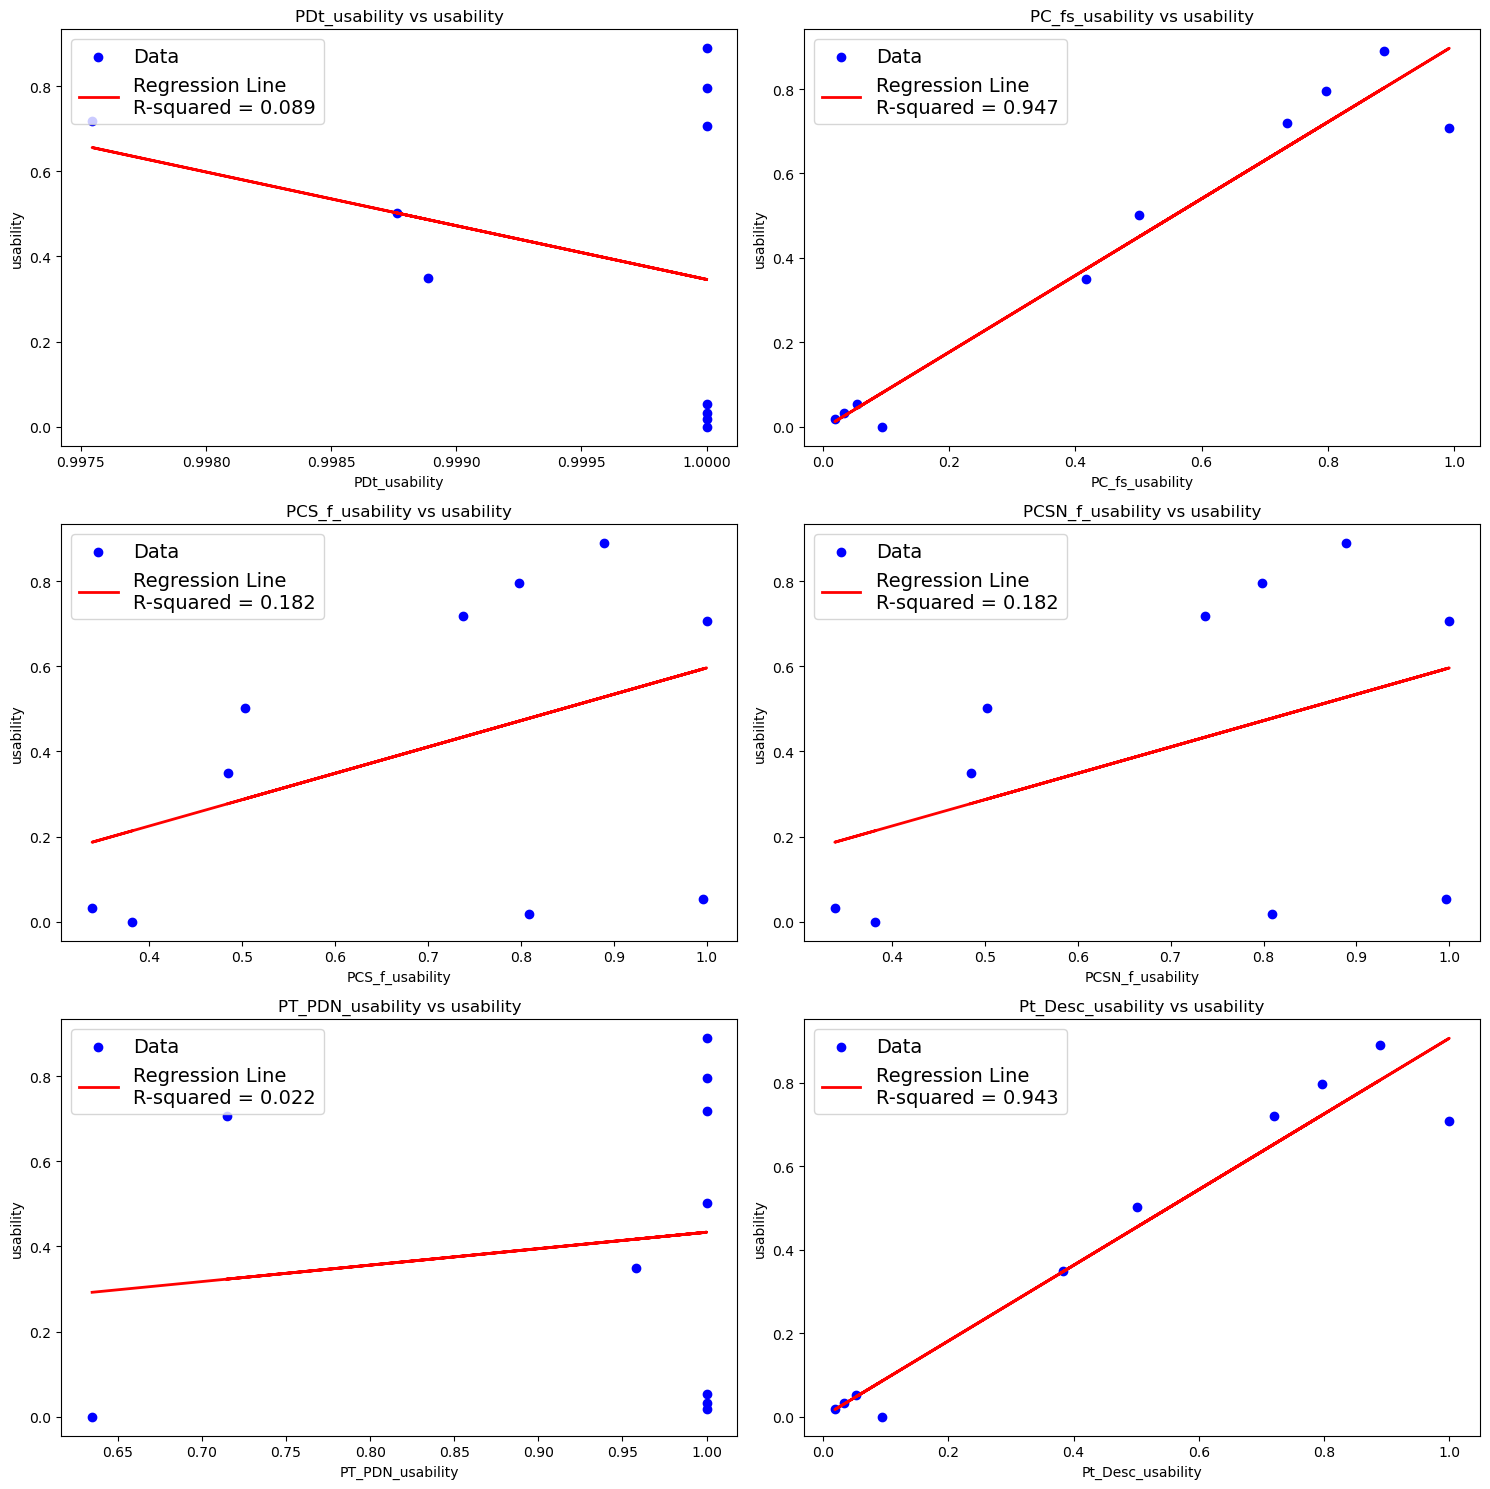

In [160]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs = axs.flatten()

# Iterate over each independent variable and plot
for i, var in enumerate(independent_vars):
    ax = axs[i]
    x = dfp0[var]
    y = dfp0['usability']
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y)
    
    # Get predictions
    y_pred = model.predict(x.values.reshape(-1, 1))
    
    # Calculate R-squared
    r2 = r2_score(y, y_pred)
    
    # Scatter plot
    scatter = ax.scatter(x, y, color='blue', label='Data')
    
    # Regression line
    line = ax.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
    
    # Add custom legend in the upper left corner with R-squared value
    ax.legend([scatter, line[0]], 
              [f'Data', f'Regression Line\nR-squared = {r2:.3f}'], 
              loc='upper left', fontsize=14)
    
    # Labels and title
    ax.set_xlabel(var)
    ax.set_ylabel('usability')
    ax.set_title(f'{var} vs usability')

plt.tight_layout()
plt.show()


# Organization Level

In [128]:
df2[['Organization']].shape
df2.Organization.value_counts(dropna=False).to_frame().reset_index()

(51524, 1)

index  \
0                                                                   UCHealth and Affiliates   
1                                                         Bon Secours Mercy Health O.H.C.A.   
2                                                                             Prisma Health   
3                                             Gundersen Health System and Regional Partners   
4                                  Sutter Health Affiliates and Community Connect Practices   
5                                                                             Novant Health   
6                                                                 Baptist Healthcare System   
7                                                  ThedaCare, Bellin Health, and Affiliates   
8                                                                           Spectrum Health   
9                                                                   Riverside Health System   
10                                           Essentia Health and Community Connect Partners   
11                                                                   Advocate Aurora Health   
12                                    Providence Health and Services Washington and Montana   
13                                                                                  Aspirus   
14                                             Allina Health Systems & Excellian Affiliates   
15                                                                        UnityPoint Health   
16                                                                              Mayo Clinic   
17                                Ochsner Health System and Its Subsidiaries and Affiliates   
18                                                                               SSM Health   
19                                     Providence Health and Services Oregon and California   
20                                                                    Shannon Health System   
21                                                           Allegheny Health Network (AHN)   
22                                                            Sanford Health and Affiliates   
23                                                                     Mass General Brigham   
24                                                                           Centura Health   
25                                                                          UNC Health Care   
26                                                                              MHC Network   
27                                                                       The Guthrie Clinic   
28                                                                              Cone Health   
29                                                                            Atrium Health   
30                                                        Atrium Health Wake Forest Baptist   
31                                        UW Health and Affiliates - Wisconsin and Illinois   
32                                                                               OhioHealth   
33                                                                St. Charles Health System   
34                                                                                 Fairview   
35                                                         CentraCare Health and Affiliates   
36                                                        West Virginia University Medicine   
37                                                                          CHRISTUS Health   
38                                                   Spartanburg Regional Healthcare System   
39                                                                                    AnMed   
40                                                                      Piedmont Healthcare   
41                                                                          UPMC Central PA   
4

In [129]:
df2.shape
# df2.columns
# df2.Vendor_New.value_counts(dropna=False)
df2[(df2.Vendor_New=='Vendor 1')& (df2.Partner !='V1 Partner Other')].Partner.value_counts(dropna=False)
df2[(df2.Vendor_New=='Vendor 1')& (df2.Partner !='V1 Partner Other')].shape
df2[(df2.Vendor_New=='Vendor 1')& (df2.Partner !='V1 Partner Other')].Organization.value_counts(dropna=False)

(51524, 81)

V1 Partner1    1629
V1 Partner2    1479
V1 Partner3     989
V1 Partner4     983
V1 Partner5     808
V1 Partner6     799
V1 Partner7     797
V1 Partner8     789
V1 Partner9     731
Name: Partner, dtype: int64

(9004, 81)

UCHealth and Affiliates                                     1629
Bon Secours Mercy Health O.H.C.A.                           1479
Prisma Health                                                989
Gundersen Health System and Regional Partners                983
Sutter Health Affiliates and Community Connect Practices     808
Novant Health                                                799
Baptist Healthcare System                                    797
ThedaCare, Bellin Health, and Affiliates                     789
Spectrum Health                                              731
Name: Organization, dtype: int64

In [130]:
# Small effect size: 
# 𝑓2=0.02f2 =0.02
# Medium effect size: 
# 𝑓2=0.15f 2 =0.15
# Large effect size: 
# 𝑓2=0.35f2=0.35

import statsmodels.stats.api as sms
from math import ceil

# Define parameters for regression
effect_size = 0.35  # Medium effect size for regression (Cohen's f^2)
alpha = 0.05        # Significance level
power = 0.80        # Desired power level
num_predictors = 6  # Number of predictors

# Calculate the required sample size for F-test (used for regression analysis)
sample_size = sms.FTestAnovaPower().solve_power(effect_size=effect_size, 
                                                k_groups=num_predictors, 
                                                alpha=alpha, 
                                                power=power)

# Round up to the nearest whole number
sample_size = ceil(sample_size)

print(f"Required sample size: {sample_size}")

Required sample size: 111


In [131]:
org = df2.Organization.value_counts(dropna=False).to_frame().reset_index()
org=org.rename(columns={'index':"Organization", 'Organization':'Count'})

org=org[org.Count>=111]
org.head()
org.shape

type(org.Organization)
org_list= org.Organization.tolist()
len(org_list)
df2[df2.Organization.isin(org_list)].shape
# # df[df.Organization.isin(org_list)].head()

o = df2.query('Organization in @ org_list')
o.shape
# df3.head()
o.Organization.nunique()
o.Organization.value_counts(dropna=False).to_frame().reset_index()

Organization  Count
0                                   UCHealth and Affiliates   1635
1                         Bon Secours Mercy Health O.H.C.A.   1479
2                                             Prisma Health    989
3             Gundersen Health System and Regional Partners    983
4  Sutter Health Affiliates and Community Connect Practices    808

(102, 2)

pandas.core.series.Series

102

(35276, 81)

(35276, 81)

102

index  Organization
0                                      UCHealth and Affiliates          1635
1                            Bon Secours Mercy Health O.H.C.A.          1479
2                                                Prisma Health           989
3                Gundersen Health System and Regional Partners           983
4     Sutter Health Affiliates and Community Connect Practices           808
5                                                Novant Health           799
6                                    Baptist Healthcare System           797
7                     ThedaCare, Bellin Health, and Affiliates           789
8                                              Spectrum Health           731
9                                      Riverside Health System           710
10              Essentia Health and Community Connect Partners           698
11                                      Advocate Aurora Health           682
12       Providence Health and Services Washington and Montana           676
13                                                     Aspirus           665
14                Allina Health Systems & Excellian Affiliates           640
15                                           UnityPoint Health           619
16   Ochsner Health System and Its Subsidiaries and Affiliates           602
17                                                 Mayo Clinic           602
18                                                  SSM Health           576
19        Providence Health and Services Oregon and California           557
20                                       Shannon Health System           527
21                              Allegheny Health Network (AHN)           513
22                               Sanford Health and Affiliates           506
23                                        Mass General Brigham           460
24                                              Centura Health           442
25                                             UNC Health Care           429
26                                          The Guthrie Clinic           426
27                                                 MHC Network           426
28                                                 Cone Health           399
29                                               Atrium Health           392
30                           Atrium Health Wake Forest Baptist           391
31           UW Health and Affiliates - Wisconsin and Illinois           374
32                                                  OhioHealth           367
33                                   St. Charles Health System           364
34                                                    Fairview           361
35                            CentraCare Health and Affiliates           341
36                           West Virginia University Medicine           313
37                                             CHRISTUS Health           309
38                      Spartanburg Regional Healthcare System           307
39                                                       AnMed           305
40                                         Piedmont Healthcare           303
41                                             UPMC Central PA           302
42                                             Parkview Health           301
43                               Duke University Health System           296
44                                                Mercy Health           280
45                                         Dartmouth-Hitchcock           277
46                                    Stormont-Vail Healthcare           269
47                                     MultiCare Health System           267
48                                         Altru Health System           264
49                                           Nebraska Medicine           259
50        Inova Health System,Valley Health and Virginia Heart           258
51                                                 Pe

In [132]:
org.shape
o.shape

(102, 2)

(35276, 81)

In [133]:
from functools import reduce
o.shape
usability_average_Org = o.groupby('Organization')['usability'].mean().to_frame().reset_index()
O_PDt_usability = o.groupby('Organization')['PDt_usability'].mean().to_frame().reset_index()
O_PC_f_usability = o.groupby('Organization')['PC_fs_usability'].mean().to_frame().reset_index()
O_PCS_f_usability = o.groupby('Organization')['PCS_f_usability'].mean().to_frame().reset_index()
O_PCSN_f_usability = o.groupby('Organization')['PCSN_f_usability'].mean().to_frame().reset_index()
O_PT_PDN_usability = o.groupby('Organization')['PT_PDN_usability'].mean().to_frame().reset_index()
O_Pt_Desc_usability = o.groupby('Organization')['Pt_Desc_usability'].mean().to_frame().reset_index()

dfs = [usability_average_Org, O_PDt_usability, O_PC_f_usability, O_PCS_f_usability,
                    O_PCSN_f_usability, O_PT_PDN_usability, O_Pt_Desc_usability]

dfo=reduce(lambda left, right,: pd.merge(left, right, on = 'Organization', how='outer'), dfs)
dfo.shape
dfo.head()

(35276, 81)

(102, 8)

Organization  usability  PDt_usability  \
0                        Advocate Aurora Health   0.815249       0.997067   
1                Allegheny Health Network (AHN)   0.637427       1.000000   
2  Allina Health Systems & Excellian Affiliates   0.090625       1.000000   
3                           Altru Health System   0.022727       1.000000   
4                                         AnMed   0.701639       1.000000   

   PC_fs_usability  PCS_f_usability  PCSN_f_usability  PT_PDN_usability  \
0         0.824047         0.825513          0.825513          0.995601   
1         0.918129         0.918129          0.918129          0.998051   
2         0.309375         0.309375          0.309375          1.000000   
3         1.000000         1.000000          1.000000          0.996212   
4         0.895082         0.895082          0.895082          0.996721   

   Pt_Desc_usability  
0           0.822581  
1           0.639376  
2           0.090625  
3           0.022727  
4           0.704918

In [134]:
# Initialize dictionaries to store results
r_squared_values = {}
intercepts = {}
coefficients = {}
regression_equations = {}

# Independent variables
independent_vars = ['PDt_usability', 'PC_fs_usability', 'PCS_f_usability',
                    'PCSN_f_usability', 'PT_PDN_usability', 'Pt_Desc_usability']

# Iterate over each independent variable
for var in independent_vars:
    # Prepare data
    X = dfo[var].values.reshape(-1, 1)
    y = dfo['usability'].values

    # Create a mask to drop NaNs from both X and y
    mask = ~pd.isna(X).ravel() & ~pd.isna(y)  # Ensures there are no NaNs in both X and y
    X = X[mask]
    y = y[mask]
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Get predictions
    y_pred = model.predict(X)
    
    # Calculate R-squared
    r2 = r2_score(y, y_pred)
    r_squared_values[var] = r2
    
    # Get intercept and coefficient
    intercept = model.intercept_
    coefficient = model.coef_[0]
    print(coefficient)
    intercepts[var] = intercept
    coefficients[var] = coefficient
    
    # Create regression equation string
    reg_eq = f'y = {intercept:.4f} + {coefficient:.4f} * {var}'
    regression_equations[var] = reg_eq
    
    # Print results
    print(f'Independent Variable: {var}')
    print(f'  R-squared: {r2:.4f}')
    print()

# Calculate contribution of each independent variable
contributions = {}
for var, r2 in r_squared_values.items():
    contribution = r2 * 100  # Convert R-squared to percentage
    contributions[var] = contribution
    
    # Print contribution
    print(f'Contribution of {var}: {contribution:.2f}%')

# Normalize the contributions to get weights on a scale of 1-5 and convert to integer
min_contribution = min(contributions.values())
max_contribution = max(contributions.values())

weights = {var: int(round(1 + (contrib - min_contribution) * (5 - 1) / (max_contribution - min_contribution))) 
           for var, contrib in contributions.items()}

# Print weights
print("\nWeights of each independent variable (1-5 scale):")
for var, weight in weights.items():
    print(f'Weight of {var}: {weight:.0f}')

# Add the weights as a new column in the DataFrame for each variable
for var in independent_vars:
    dfo[var + '_Weight'] = weights[var]    

# Calculate weighted average for each row
dfo['weighted_average'] = sum(dfo[var] * weights[var] for var in independent_vars) / sum(weights.values())

# Calculate simple average for each row
dfo['simple_average'] = dfo[independent_vars].mean(axis=1)

# Calculate the average of weighted_average and simple_average
average_weighted_average = dfo['weighted_average'].mean()
average_simple_average = dfo['simple_average'].mean()

print(f"\nAverage of 'weighted_average': {average_weighted_average:.4f}")
print(f"Average of 'simple_average': {average_simple_average:.4f}")

# Print the updated DataFrame
print("\nUpdated DataFrame with weighted average and simple average:")
dfo.head()
dfo.shape


LinearRegression()

1.2804330169977778
Independent Variable: PDt_usability
  R-squared: 0.0109



LinearRegression()

0.8456688661742032
Independent Variable: PC_fs_usability
  R-squared: 0.7569



LinearRegression()

0.7250517795575987
Independent Variable: PCS_f_usability
  R-squared: 0.4872



LinearRegression()

0.7204214253576217
Independent Variable: PCSN_f_usability
  R-squared: 0.4932



LinearRegression()

0.3644925555416663
Independent Variable: PT_PDN_usability
  R-squared: 0.0348



LinearRegression()

0.9125219447844942
Independent Variable: Pt_Desc_usability
  R-squared: 0.8616

Contribution of PDt_usability: 1.09%
Contribution of PC_fs_usability: 75.69%
Contribution of PCS_f_usability: 48.72%
Contribution of PCSN_f_usability: 49.32%
Contribution of PT_PDN_usability: 3.48%
Contribution of Pt_Desc_usability: 86.16%

Weights of each independent variable (1-5 scale):
Weight of PDt_usability: 1
Weight of PC_fs_usability: 5
Weight of PCS_f_usability: 3
Weight of PCSN_f_usability: 3
Weight of PT_PDN_usability: 1
Weight of Pt_Desc_usability: 5

Average of 'weighted_average': 0.5420
Average of 'simple_average': 0.6578

Updated DataFrame with weighted average and simple average:


Organization  usability  PDt_usability  \
0                        Advocate Aurora Health   0.815249       0.997067   
1                Allegheny Health Network (AHN)   0.637427       1.000000   
2  Allina Health Systems & Excellian Affiliates   0.090625       1.000000   
3                           Altru Health System   0.022727       1.000000   
4                                         AnMed   0.701639       1.000000   

   PC_fs_usability  PCS_f_usability  PCSN_f_usability  PT_PDN_usability  \
0         0.824047         0.825513          0.825513          0.995601   
1         0.918129         0.918129          0.918129          0.998051   
2         0.309375         0.309375          0.309375          1.000000   
3         1.000000         1.000000          1.000000          0.996212   
4         0.895082         0.895082          0.895082          0.996721   

   Pt_Desc_usability  PDt_usability_Weight  PC_fs_usability_Weight  \
0           0.822581                     1                       5   
1           0.639376                     1                       5   
2           0.090625                     1                       5   
3           0.022727                     1                       5   
4           0.704918                     1                       5   

   PCS_f_usability_Weight  PCSN_f_usability_Weight  PT_PDN_usability_Weight  \
0                       3                        3                        1   
1                       3                        3                        1   
2                       3                        3                        1   
3                       3                        3                        1   
4                       3                        3                        1   

   Pt_Desc_usability_Weight  weighted_average  simple_average  
0                         5          0.843271        0.881720  
1                         5          0.849686        0.898635  
2                         5          0.325347        0.503125  
3                         5          0.728325        0.836490  
4                         5          0.853734        0.897814

(102, 16)

LinearRegression()

Text(0.5, 0, 'PDt_usability')

Text(0, 0.5, 'usability')

Text(0.5, 1.0, 'PDt_usability vs usability')

LinearRegression()

Text(0.5, 0, 'PC_fs_usability')

Text(0, 0.5, 'usability')

Text(0.5, 1.0, 'PC_fs_usability vs usability')

LinearRegression()

Text(0.5, 0, 'PCS_f_usability')

Text(0, 0.5, 'usability')

Text(0.5, 1.0, 'PCS_f_usability vs usability')

LinearRegression()

Text(0.5, 0, 'PCSN_f_usability')

Text(0, 0.5, 'usability')

Text(0.5, 1.0, 'PCSN_f_usability vs usability')

LinearRegression()

Text(0.5, 0, 'PT_PDN_usability')

Text(0, 0.5, 'usability')

Text(0.5, 1.0, 'PT_PDN_usability vs usability')

LinearRegression()

Text(0.5, 0, 'Pt_Desc_usability')

Text(0, 0.5, 'usability')

Text(0.5, 1.0, 'Pt_Desc_usability vs usability')

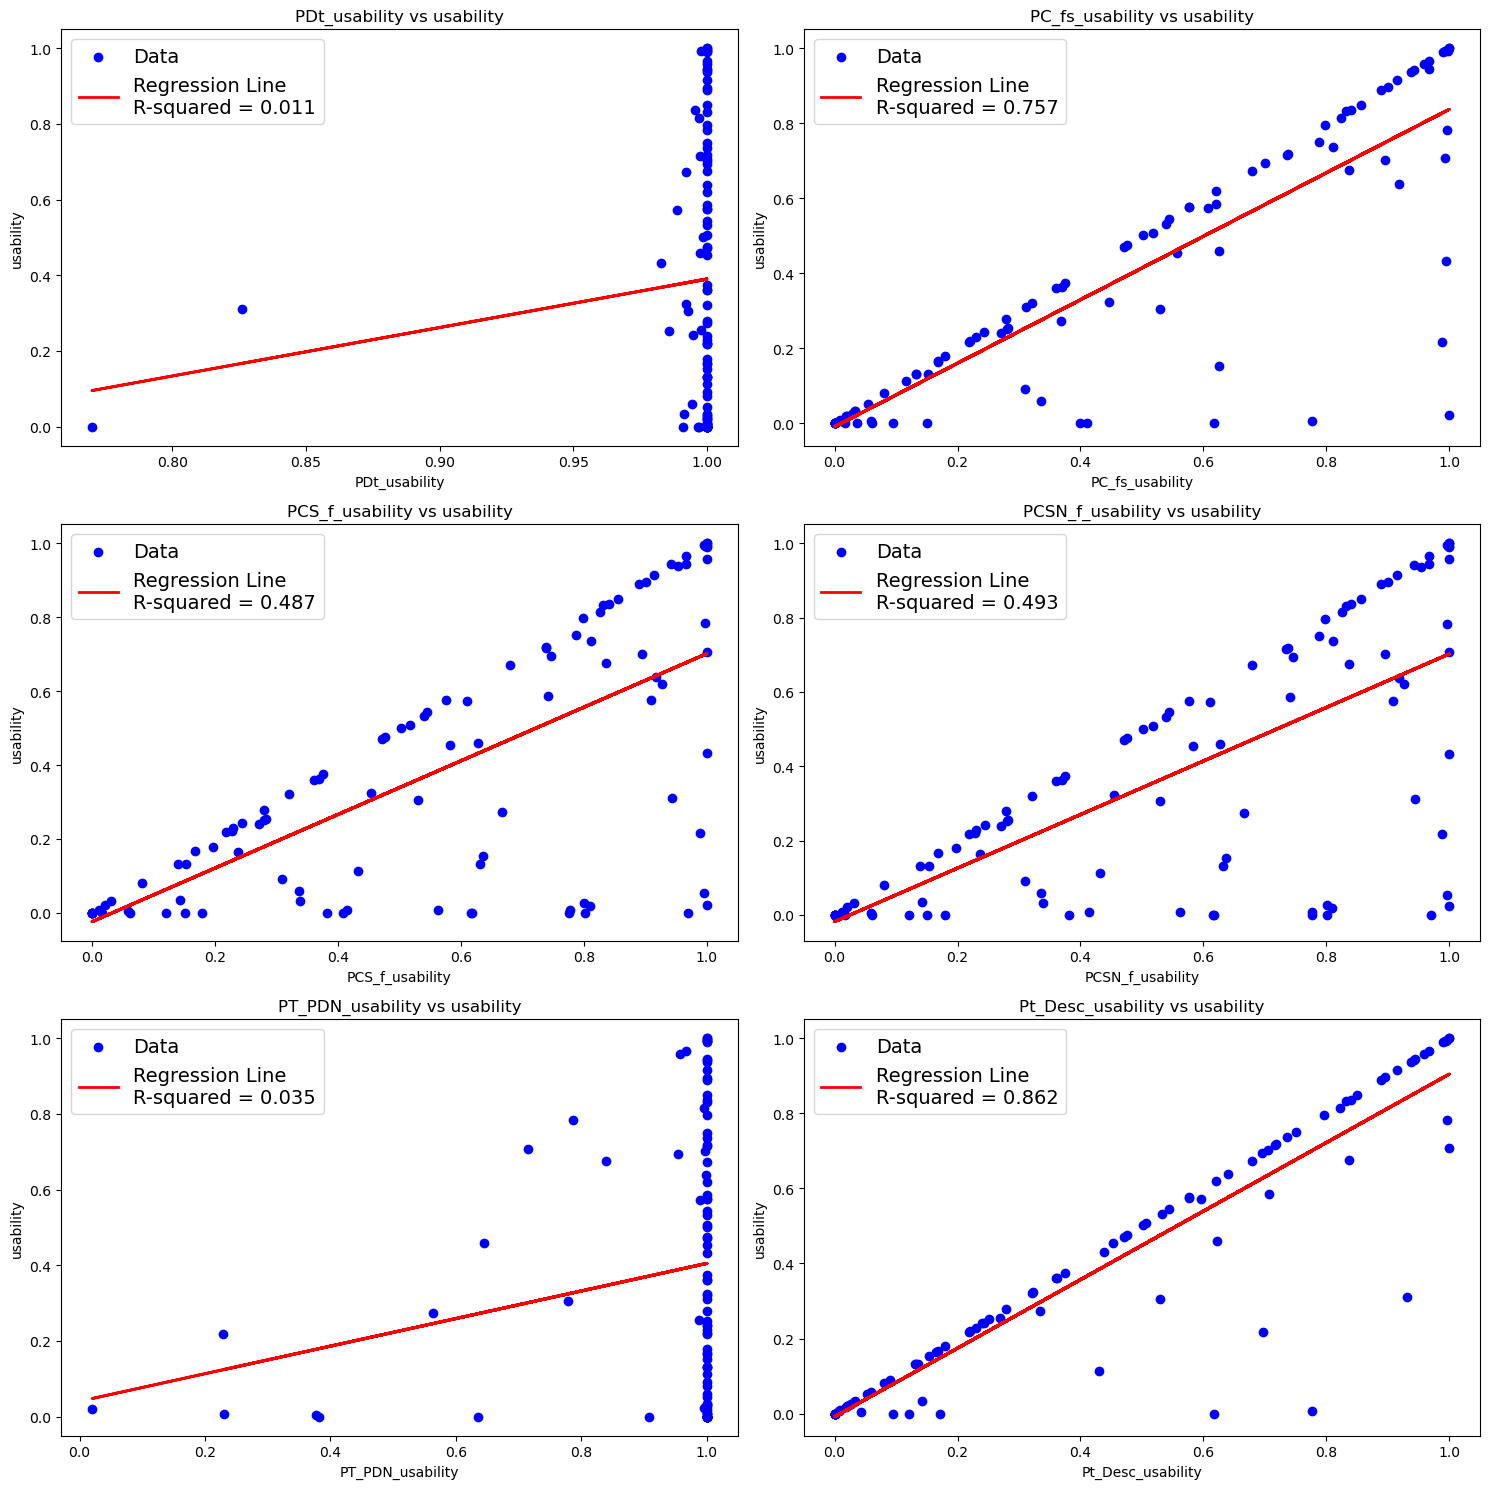

In [135]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs = axs.flatten()

# Iterate over each independent variable and plot
for i, var in enumerate(independent_vars):
    ax = axs[i]
    x = dfo[var]
    y = dfo['usability']
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y)
    
    # Get predictions
    y_pred = model.predict(x.values.reshape(-1, 1))
    
    # Calculate R-squared
    r2 = r2_score(y, y_pred)
    
    # Scatter plot
    scatter = ax.scatter(x, y, color='blue', label='Data')
    
    # Regression line
    line = ax.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
    
    # Add custom legend in the upper left corner with R-squared value
    ax.legend([scatter, line[0]], 
              [f'Data', f'Regression Line\nR-squared = {r2:.3f}'], 
              loc='upper left', fontsize=14)
    
    # Labels and title
    ax.set_xlabel(var)
    ax.set_ylabel('usability')
    ax.set_title(f'{var} vs usability')

plt.tight_layout()
plt.show()


In [136]:
vo = pd.merge(v, dfo, on ='Organization', how= 'outer')
vo.shape
vo.head(2)
vo.usability.value_counts(dropna=False)
vo.usability.nunique()
# vo.Partner.nunique()
vo.head(18)

(51524, 81)

File_Name  \
0         12840114350113359278688883749060940_20230628154125837000_1370355721308.xml   
1  a6bb8b0484922ece891e590d7a455e637721627768_20230628173747323000_1370795147014.xml   

                  Patient_ID_md_hex            Organization  \
0  FFFECBB5FD95BD8BDFF949890546B6D3  WellStar Health System   
1  FF1D0E5EBF52772D1886D6ADE846D1B6  WellStar Health System   

                                  Software Document_Date Effective_Date  \
0  Epic - Version 10.3 Epic - Version 10.3    06/28/2023            nan   
1  Epic - Version 10.3 Epic - Version 10.3    06/28/2023            nan   

   Start_Date    End_Date Procedure_Date                Procedure_Text  \
0  11/18/2022  11/18/2022     11/18/2022         GI-COLONOSCOPY (LVL4)   
1  06/27/2022  06/27/2022     06/27/2022  COLONOSCOPY WITH POLYPECTOMY   

         Procedure_Display_Name Procedure_Code Procedure_Code_System  \
0         GI-COLONOSCOPY (LVL4)            UNK                   nan   
1  COLONOSCOPY WITH POLYPECTOMY            UNK                   nan   

  Procedure_Code_System_Name Procedure_Date_f   Doc_Date  Doc_Year Doc_Date_f  \
0                        nan                Y 2023-06-28      2023          Y   
1                        nan                Y 2023-06-28      2023          Y   

  Procedure_Code_Description              Procedure_Text_c  \
0                        nan         GI-COLONOSCOPY (LVL4)   
1                        nan  COLONOSCOPY WITH POLYPECTOMY   

       Procedure_Display_Name_c                   PT_no_punct  \
0         GI-COLONOSCOPY (LVL4)         gi-colonoscopy  lvl4    
1  COLONOSCOPY WITH POLYPECTOMY  colonoscopy with polypectomy   

                   PDN_no_punct                                PC Vendor  \
0         gi-colonoscopy  lvl4   OTH/Other/UNK/Unknown/NI/Missing   Epic   
1  colonoscopy with polypectomy  OTH/Other/UNK/Unknown/NI/Missing   Epic   

  ptdn_f      PCS PCS_f     PCSN PCSN_f PC_PCS PC_PCS_PCSN PC_PCS_PCSN_PDt  \
0      Y  Missing     N  Missing      N      N           N               N   
1      Y  Missing     N  Missing      N      N           N               N   

  PC_PCS_PCSN_PDt_pt_pdn !NLP_var NLP_var2 NLP_var PC_PCS_PCSN_PDt_pt_pdn_nlp  \
0                      N        N        N       N                          N   
1                      N        N        N       N                          N   

  Usable2  Proc_Date  Proc_Year  Proc_Month  Proc_Day  Pt_ID_cnt PC_f PC_fs  \
0      No 2022-11-18       2022          11        18          2    N     N   
1      No 2022-06-27       2022           6        27          1    N     N   

  !NLP_var_s Usable              Procedure_Text_p  \
0          N     No         GI-COLONOSCOPY (LVL4)   
1          N     No  COLONOSCOPY WITH POLYPECTOMY   

       Procedure_Display_Name_p                               PC1     PCS1  \
0         GI-COLONOSCOPY (LVL4)  OTH/Other/UNK/Unknown/NI/Missing  Missing   
1  COLONOSCOPY WITH POLYPECTOMY  OTH/Other/UNK/Unknown/NI/Missing  Missing   

   Month_cnt Vendor_New PC_Type PC_Type2 PCS_Type2 PCSN_Type Proc_Y  \
0        960   Vendor 1     UNK      UNK   Missing   Missing   2022   
1       1002   Vendor 1     UNK      UNK   Missing   Missing   2022   

  ProcedureDt Pt Dn Pt_Desc PT_PDN  PT_PDN_Pct Usable_f           Partner  \
0           Y   Yes       N      Y       100.0        N  V1 Partner Other   
1           Y   Yes       N      Y       100.0        N  V1 Partner Other   

   usability  PDt_usability  PC_fs_usability  PCS_f_usability  \
0   0.323077       0.992308         0.446154         0.453846   
1   0.323077       0.992308         0.446154         0.453846   

   PCSN_f_usability  PT_PDN_usability  Pt_Desc_usability  \
0          0.453846               1.0           0.323077   
1          0.453846               1.0           0.323077   

   PDt_usability_Weight  PC_fs_usability_Weight  PCS_f_usability_Weight  \
0                   1.0                     5.0                     3.0   
1            

NaN         16248
0.000000     4832
0.716208     1635
0.796484     1479
0.052578      989
0.889115      983
0.501238      808
0.707134      799
0.018821      797
0.032953      789
0.007042      710
0.131805      698
0.815249      682
0.178994      676
0.090625      640
0.360258      619
0.242525      602
0.305556      576
0.220826      557
0.058824      527
0.637427      513
0.229249      506
0.254348      460
0.131222      442
0.993007      429
0.025822      426
0.576441      399
0.459184      392
0.675192      391
0.695187      374
0.217984      367
0.453297      364
0.113573      361
0.914956      341
1.000000      331
0.718850      313
0.783172      309
0.701639      305
0.937294      303
0.750831      301
0.989865      296
0.507143      280
0.996283      269
0.573034      267
0.022727      264
0.320463      259
0.131783      258
0.164659      249
0.966245      237
0.836207      232
0.470852      223
0.080569      211
0.167488      203
0.279188      197
0.895833      192
0.958115  

85

File_Name  \
0          12840114350113359278688883749060940_20230628154125837000_1370355721308.xml   
1   a6bb8b0484922ece891e590d7a455e637721627768_20230628173747323000_1370795147014.xml   
2   b4126d961f5b93291fe96c371f5d446f1052833602_20230515154815999000_1272274999723.xml   
3       197cc9624df26526c09561d3bf050ac77560539807_20230706165601629000_1385623866697   
4          12840114350113359278688883724654890_20230518151653508000_1282959992879.xml   
5          12840114350113359278688883743798655_20230613173309400000_1341093449889.xml   
6          12840114350113359278688883731925072_20230531165829192000_1311671402767.xml   
7          12840114350113359278688883732644525_20230601150133492000_1314563458076.xml   
8   086325adf236d0ab093b8cbf58cf7d952582659780_20230508170821576000_1256596476573.xml   
9          12840114350113359278688883722839057_20230516175651515000_1276501832471.xml   
10         12840114350113359278688883721721647_20230515171729180000_1272787126909.xml   
11  c729125f5f448e75f7e4cdd07bc26fb47557295658_20230508152337836000_1256134756459.xml   
12         12840114350113359278688883753131124_20230711160930638000_1394862536819.xml   
13         12840114350113359278688883746239526_20230620165148171000_1353062854658.xml   
14         12840114350113359278688883714634797_20230504153451714000_1250189770500.xml   
15         12840114350113359278688883749558349_20230629164124494000_1373352189077.xml   
16         12840114350113359278688883753136301_20230711162335047000_1394880725385.xml   
17         12840114350113359278688883748613552_20230627160915842000_1367662637924.xml   

                   Patient_ID_md_hex            Organization  \
0   FFFECBB5FD95BD8BDFF949890546B6D3  WellStar Health System   
1   FF1D0E5EBF52772D1886D6ADE846D1B6  WellStar Health System   
2   FEE67B468F073BB5D0C61F3AA702E4D6  WellStar Health System   
3   FD4687D505F5550E8C68135FCD89E5AF  WellStar Health System   
4   FB88F98BDE8BAB6D7DA1D63380B989E3  WellStar Health System   
5   F9546A5E9081125E144E7F405C022D9D  WellStar Health System   
6   F93709B43D325B2FCD9F80C6B0F4FA57  WellStar Health System   
7   F84AFC8ACA80549DDC71A70FC1349D29  WellStar Health System   
8   F6C0AAD9002C7572BAC3A121A2CC62EF  WellStar Health System   
9   F56087988F329CDB015339B0A44EF647  WellStar Health System   
10  F46DA01AB5796B7E1E0178820D312025  WellStar Health System   
11  F41D235593ABABD3BAA5833782CDAB39  WellStar Health System   
12  F1FC38E586CD1A4AE8CAD59E8CBFA465  WellStar Health System   
13  EF4B6D543F8C15A696AB58D7CFEDD13C  WellStar Health System   
14  EF1F235A20C1FE581ABFB81E50D76C6A  WellStar Health System   
15  EC40842404EE21283C8806046E9318CD  WellStar Health System   
16  E48491207BE16B309610DEC37D91A00C  WellStar Health System   
17  DF2AC18F9339375213F04D339F421879  WellStar Health System   

                                   Software Document_Date Effective_Date  \
0   Epic - Version 10.3 Epic - Version 10.3    06/28/2023            nan   
1   Epic - Version 10.3 Epic - Version 10.3    06/28/2023            nan   
2   Epic - Version 10.3 Epic - Version 10.3    05/15/2023     12/28/2021   
3   Epic - Version 10.3 Epic - Version 10.3    07/06/2023     12/01/2020   
4   Epic - Version 10.3 Epic - Version 10.3    05/18/2023            nan   
5   Epic - Version 10.3 Epic - Version 10.3    06/13/2023            nan   
6   Epic - Version 10.3 Epic - Version 10.3    05/31/2023            nan   
7   Epic - Version 10.3 Epic - Version 10.3    06/01/2023            nan   
8   Epic - Version 10.3 Epic - Version 10.3    05/08/2023            nan   
9   Epic - Version 10.3 Epic - Version 10.3    05/16/2023            nan   
10  Epic - Version 10.3 Epic - Version 10.3    05/15/2023            nan   
11  Epic - Version 10.3 Epic - Version 10.3    05/08/2023            nan   
12  Epic - Version 10.3 Epic - Version 10.3    07/11/2023            nan   
13  Epic - Version 10.3 Epic - Version 10.3    06/20/2023            nan   
14  Epic - Version 10.3 Epi

In [137]:
vo.Organization.nunique()
vo.Organization.value_counts(dropna=False)

3112

UCHealth and Affiliates                                                                  1635
Bon Secours Mercy Health O.H.C.A.                                                        1479
Prisma Health                                                                             989
Gundersen Health System and Regional Partners                                             983
Sutter Health Affiliates and Community Connect Practices                                  808
Novant Health                                                                             799
Baptist Healthcare System                                                                 797
ThedaCare, Bellin Health, and Affiliates                                                  789
Spectrum Health                                                                           731
Riverside Health System                                                                   710
Essentia Health and Community Connect Partners              

In [138]:
vo.Partner.nunique()
vo.Partner.value_counts(dropna=False)

17

V1 Partner Other      34073
All Other Partners     7579
V1 Partner1            1629
V1 Partner2            1479
V1 Partner3             989
V1 Partner4             983
V1 Partner5             808
V1 Partner6             799
V1 Partner7             797
V1 Partner8             789
V1 Partner9             731
V4 Partner1             426
V2 Partner1             101
V3 Partner1              94
V3 Partner2              84
V2 Partner2              84
V4 Partner2              79
Name: Partner, dtype: int64

In [161]:
v1p1 = vo[(vo.Partner == 'V1 Partner9') ]
v1p1.shape

dd =v1p1.copy() 

dd.ProcedureDt.value_counts(dropna=False)
dd.PC_fs.value_counts(dropna=False)
dd.PCS_f.value_counts(dropna=False)
dd.PCSN_f.value_counts(dropna=False)
dd.PT_PDN.value_counts(dropna=False)
dd.Pt_Desc.value_counts(dropna=False)

pdt_u = calculate_y_ratio(dd, 'ProcedureDt')

pc_u = calculate_y_ratio(dd, 'PC_fs')

pcs_u = calculate_y_ratio(dd, 'PCS_f')

pcsn_u = calculate_y_ratio(dd, 'PCSN_f')

ptdn_u = calculate_y_ratio(dd, 'PT_PDN')

pt_desc_u = calculate_y_ratio(dd, 'Pt_Desc')

usable_u = calculate_y_ratio(dd, 'Usable')

print('usablity:', usable_u)
print()
print('pdt_u:', pdt_u)
print('pc_u:', pc_u)
print("pcs_u:", pcs_u)
print("pcsn_u:", pcsn_u)
print("ptdn_u:", ptdn_u)
print("pt_desc_u:", pt_desc_u)
print()

w_u = (pdt_u*1+pc_u*5+pcs_u*3+pcsn_u*3+ptdn_u*1+pt_desc_u*5)/(1+5+3+3+1+5)
print('weighted_u:', w_u)

(731, 81)

Y    731
Name: ProcedureDt, dtype: int64

N    662
Y     69
Name: PC_fs, dtype: int64

N    452
Y    279
Name: PCS_f, dtype: int64

N    452
Y    279
Name: PCSN_f, dtype: int64

Y    464
N    267
Name: PT_PDN, dtype: int64

N    662
Y     69
Name: Pt_Desc, dtype: int64

usablity: 0.0

pdt_u: 1.0
pc_u: 0.09439124487004104
pcs_u: 0.3816689466484268
pcsn_u: 0.3816689466484268
ptdn_u: 0.6347469220246238
pt_desc_u: 0.09439124487004104

weighted_u: 0.27048183614531085


In [162]:


v1p1 = vo[(vo.Partner == 'V1 Partner9')  & (vo.ProcedureDt == 'Y')]
v1p1.shape

dd =v1p1.copy() 

dd.ProcedureDt.value_counts(dropna=False)
dd.PC_fs.value_counts(dropna=False)
dd.PCS_f.value_counts(dropna=False)
dd.PCSN_f.value_counts(dropna=False)
dd.PT_PDN.value_counts(dropna=False)
dd.Pt_Desc.value_counts(dropna=False)

pdt_u = calculate_y_ratio(dd, 'ProcedureDt')

pc_u = calculate_y_ratio(dd, 'PC_fs')

pcs_u = calculate_y_ratio(dd, 'PCS_f')

pcsn_u = calculate_y_ratio(dd, 'PCSN_f')

ptdn_u = calculate_y_ratio(dd, 'PT_PDN')

pt_desc_u = calculate_y_ratio(dd, 'Pt_Desc')

usable_u = calculate_y_ratio(dd, 'Usable_f')

print('usablity:', usable_u)
print()
print('pdt_u:', pdt_u)
print('pc_u:', pc_u)
print("pcs_u:", pcs_u)
print("pcsn_u:", pcsn_u)
print("ptdn_u:", ptdn_u)
print("pt_desc_u:", pt_desc_u)
print()

w_u = (pdt_u*1+pc_u*4+pcs_u*3+pcsn_u*3+ptdn_u*1+pt_desc_u*5)/(1+5+3+3+1+5)
print('weighted_u:', w_u)

(731, 81)

Y    731
Name: ProcedureDt, dtype: int64

N    662
Y     69
Name: PC_fs, dtype: int64

N    452
Y    279
Name: PCS_f, dtype: int64

N    452
Y    279
Name: PCSN_f, dtype: int64

Y    464
N    267
Name: PT_PDN, dtype: int64

N    662
Y     69
Name: Pt_Desc, dtype: int64

usablity: 0.0

pdt_u: 1.0
pc_u: 0.09439124487004104
pcs_u: 0.3816689466484268
pcsn_u: 0.3816689466484268
ptdn_u: 0.6347469220246238
pt_desc_u: 0.09439124487004104

weighted_u: 0.26523787809697524


In [163]:
v1p1 = vo[(vo.Partner == 'V1 Partner9') & (vo.PT_PDN == 'Y')]
v1p1.shape

dd =v1p1.copy() 

dd.ProcedureDt.value_counts(dropna=False)
dd.PC_fs.value_counts(dropna=False)
dd.PCS_f.value_counts(dropna=False)
dd.PCSN_f.value_counts(dropna=False)
dd.PT_PDN.value_counts(dropna=False)
dd.Pt_Desc.value_counts(dropna=False)

pdt_u = calculate_y_ratio(dd, 'ProcedureDt')
pc_u = calculate_y_ratio(dd, 'PC_fs')
pcs_u = calculate_y_ratio(dd, 'PCS_f')
pcsn_u = calculate_y_ratio(dd, 'PCSN_f')
ptdn_u = calculate_y_ratio(dd, 'PT_PDN')
pt_desc_u = calculate_y_ratio(dd, 'Pt_Desc')

usable_u = calculate_y_ratio(dd, 'Usable')

print('usablity:', usable_u)
print()
print('pdt_u:', pdt_u)
print('pc_u:', pc_u)
print("pcs_u:", pcs_u)
print("pcsn_u:", pcsn_u)
print("ptdn_u:", ptdn_u)
print("pt_desc_u:", pt_desc_u)
print()

w_u = (pdt_u*1+pc_u*5+pcs_u*3+pcsn_u*3+ptdn_u*1+pt_desc_u*5)/(1+5+3+3+1+5)
print('weighted_u:', w_u)

(464, 81)

Y    464
Name: ProcedureDt, dtype: int64

N    464
Name: PC_fs, dtype: int64

N    450
Y     14
Name: PCS_f, dtype: int64

N    450
Y     14
Name: PCSN_f, dtype: int64

Y    464
Name: PT_PDN, dtype: int64

N    464
Name: Pt_Desc, dtype: int64

usablity: 0.0

pdt_u: 1.0
pc_u: 0.0
pcs_u: 0.03017241379310345
pcsn_u: 0.03017241379310345
ptdn_u: 1.0
pt_desc_u: 0.0

weighted_u: 0.12116858237547892


In [164]:
vo.shape
vo.columns

(51524, 81)

Index(['File_Name', 'Patient_ID_md_hex', 'Organization', 'Software',
       'Document_Date', 'Effective_Date', 'Start_Date', 'End_Date',
       'Procedure_Date', 'Procedure_Text', 'Procedure_Display_Name',
       'Procedure_Code', 'Procedure_Code_System', 'Procedure_Code_System_Name',
       'Procedure_Date_f', 'Doc_Date', 'Doc_Year', 'Doc_Date_f',
       'Procedure_Code_Description', 'Procedure_Text_c',
       'Procedure_Display_Name_c', 'PT_no_punct', 'PDN_no_punct', 'PC',
       'Vendor', 'ptdn_f', 'PCS', 'PCS_f', 'PCSN', 'PCSN_f', 'PC_PCS',
       'PC_PCS_PCSN', 'PC_PCS_PCSN_PDt', 'PC_PCS_PCSN_PDt_pt_pdn', '!NLP_var',
       'NLP_var2', 'NLP_var', 'PC_PCS_PCSN_PDt_pt_pdn_nlp', 'Usable2',
       'Proc_Date', 'Proc_Year', 'Proc_Month', 'Proc_Day', 'Pt_ID_cnt', 'PC_f',
       'PC_fs', '!NLP_var_s', 'Usable', 'Procedure_Text_p',
       'Procedure_Display_Name_p', 'PC1', 'PCS1', 'Month_cnt', 'Vendor_New',
       'PC_Type', 'PC_Type2', 'PCS_Type2', 'PCSN_Type', 'Proc_Y',
       'Procedur

In [ ]:
# ['File_Name', 'Patient_ID_md_hex', 'Organization', 'Software',
#        'Document_Date', 'Effective_Date', 'Start_Date', 'End_Date',
#        'Procedure_Date', 'Procedure_Text', 'Procedure_Display_Name',
#        'Procedure_Code', 'Procedure_Code_System', 'Procedure_Code_System_Name',
#        'Procedure_Date_f', 'Doc_Date', 'Doc_Year', 'Doc_Date_f',
#        'Procedure_Code_Description', 'Procedure_Text_c',
#        'Procedure_Display_Name_c', 'PT_no_punct', 'PDN_no_punct', 'PC',
#        'Vendor', 'ptdn_f', 'PCS', 'PCS_f', 'PCSN', 'PCSN_f', 'PC_PCS',
#        'PC_PCS_PCSN', 'PC_PCS_PCSN_PDt', 'PC_PCS_PCSN_PDt_pt_pdn', '!NLP_var',
#        'NLP_var2', 'NLP_var', 'PC_PCS_PCSN_PDt_pt_pdn_nlp', 'Usable2',
#        'Proc_Date', 'Proc_Year', 'Proc_Month', 'Proc_Day', 'Pt_ID_cnt', 'PC_f',
#        'PC_fs', '!NLP_var_s', 'Usable', 'Procedure_Text_p',
#        'Procedure_Display_Name_p', 'PC1', 'PCS1', 'Month_cnt', 'Vendor_New',
#        'PC_Type', 'PC_Type2', 'PCS_Type2', 'PCSN_Type', 'Proc_Y',
#        'ProcedureDt', 'Pt Dn', 'Pt_Desc', 'PT_PDN', 'PT_PDN_Pct', 'Partner',
#        'usability', 'PDt_usability', 'PC_fs_usability', 'PCS_f_usability',
#        'PCSN_f_usability', 'PT_PDN_usability', 'Pt_Desc_usability',
#        'PDt_usability_Weight', 'PC_fs_usability_Weight',
#        'PCS_f_usability_Weight', 'PCSN_f_usability_Weight',
#        'PT_PDN_usability_Weight', 'Pt_Desc_usability_Weight',
#        'weighted_average', 'simple_average']

In [165]:
# start = datetime.now()
# vo.to_parquet('Unique_Pt_20241015.parquet', engine="pyarrow")
# print(datetime.now() - start)

0:00:01.322966


In [166]:
# start = datetime.now()
# vo.to_excel('Unique_Pt_20241015.xlsx', sheet_name = "Unique_Pt")
# print(datetime.now() - start)

0:02:35.103319


In [ ]:
# w_u = (PDt_Usability*1 + PC_Usability*4 + PCS_Usability*3 + PCSN_Usability*3 + PT_DN_Usability*1 + PT_PDesc_Usability*5)/(1+4+3+3+1+5)
# print('weighted_u:', w_u)

In [ ]:
v.shape
vo.columns

In [ ]:
vo['VP'] = np.where(vo.Partner=='V1 Partner10', 'V1 Partner Other', vo.Partner)
vo['VP'].value_counts(dropna=False) 
vo['VP'].nunique()

In [ ]:
vo.Vendor.value_counts(dropna=False) 
vo.Vendor_New.value_counts(dropna=False) 

In [ ]:
vo[vo.Vendor=='InterSystems InterSystems HealthShare'].Organization.value_counts()

In [ ]:
vo.columns

In [ ]:
vo.Procedure_Code.value_counts(dropna=False)

In [ ]:
%run PAT_func.py

In [ ]:
vo.PC_Type2.value_counts(dropna=False)

In [ ]:
vo['PC_Comp'] = np.where(vo.PC_Type2.isin(['Usable PC', 'Not Usable PC']), 'Present', vo.PC_Type2)
vo['PC_Comp'].value_counts(dropna=False)
vo['PC_Comp'].value_counts(normalize= True, dropna=False)

In [ ]:


vo['PC_Comp'] = vo.Procedure_Code.str.upper().apply(f)
vo['PC_Comp'].value_counts(dropna=False)
vo['PC_Comp'].value_counts(normalize= True, dropna=False)
print()
vo['PCS_Comp'] = vo.Procedure_Code_System.str.upper().apply(f)
vo['PCS_Comp'].value_counts(dropna=False)
vo['PCS_Comp'].value_counts(normalize= True, dropna=False)
print()
vo['PCSN_Comp'] = vo.Procedure_Code_System_Name.str.upper().apply(f)
vo['PCSN_Comp'].value_counts(dropna=False)
vo['PCSN_Comp'].value_counts(normalize= True, dropna=False)

In [ ]:
vo['PCSN_Comp'] = vo.Procedure_Code_System_Name.str.upper().apply(f)
vo['PCSN_Comp'].value_counts(dropna=False)
vo['PCSN_Comp'].value_counts(normalize= True, dropna=False)

In [ ]:
# import pandas as pd

# # Sample DataFrame
# data = {'col1': ['apple orange', 'banana mango', 'grape watermelon'],
#         'col2': ['orange banana', 'grape apple', 'apple mango']}

# df = pd.DataFrame(data)

# # Function to check if any word from col1 exists in col2 using set
# def check_word_match(row):
#     set_col1 = set(row['col1'].split())
#     set_col2 = set(row['col2'].split())
#     return 'Yes' if set_col1 & set_col2 else 'No'

# # Apply the function to the DataFrame
# df['col3'] = df.apply(check_word_match, axis=1)

# print(df)


In [ ]:
# import pandas as pd

# # Sample DataFrame
# data = {'col1': ['apple orange', 'BANANA mango', 'grape Watermelon', 'Grape'],
#         'col2': ['Orange BANANA', 'Grape apple', 'apple MANGO', 'grape']}

# df = pd.DataFrame(data)

# # Function to check word match and calculate percentage
# def calculate_match(row):
#     # Convert to lowercase and split into sets
#     set_col1 = set(row['col1'].lower().split())
#     set_col2 = set(row['col2'].lower().split())
    
#     # Calculate intersection
#     match_words = set_col1 & set_col2
#     total_words = set_col1.union(set_col2)
    
#     # Calculate percentage match
#     match_percentage = len(match_words) / len(total_words) * 100 if total_words else 0
    
#     return pd.Series({
#         'col3': 'Yes' if match_words else 'No',
#         'col4': f'{match_percentage:.2f}%'  # Format the percentage with 2 decimal places
#     })

# # Apply the function to the DataFrame
# df[['col3', 'col4']] = df.apply(calculate_match, axis=1)

# print(df)

